<hr>
<a class="anchor">
    
# **Data Mining I Final Group Project**

Postgraduate Program in Statistical Systems, with a specialization in Central Banks' Statistics

2023/2024

---
*Project: Wonderful Wines of the World*

---

**Table of Contents** <br>
* [1. Import Libraries](#import_libraries)
* [2. Import Dataset](#import_dataset)
* [3. Exploring the Dataset](#exploring_the_dataset)
* [4. Outlier removal](#outliers)
* [5. Feature engineering and selection](#features)
* [6. Normalization](#normalization)
* [7. Clustering](#clustering)
    * [7.1. K Means](#k_means)
      * [7.1.1. Client Cluster](#k_means_client)
      * [7.1.2. Wine Cluster](#k_means_wine)
    * [7.2. Hierarchical Clustering](#hierarchical_clustering)
      * [7.2.1. Client Cluster](#hc_client)
      * [7.2.2. Wine Cluster](#hc_wine)



<hr>
<a class="anchor" name="import_libraries">
    
# 1. Import Libraries
    
</a>

In [1]:
# Install updated version of pandas_profiling

!pip install pandas_profiling==3.3.0

# Importing the relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sqlite3
import os
from math import ceil
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score, silhouette_samples
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt


# Some configuration

%matplotlib inline

# For better resolution plots
%config InlineBackend.figure_format = 'retina'

# Set seaborn style
sns.set()

ERROR: Ignored the following versions that require a different python version: 3.3.0 Requires-Python >=3.7, <3.11; 3.4.0 Requires-Python >=3.7, <3.11; 3.5.0 Requires-Python >=3.7, <3.11; 3.6.0 Requires-Python >=3.7, <3.11; 3.6.1 Requires-Python >=3.7, <3.11; 3.6.2 Requires-Python >=3.7, <3.11; 3.6.3 Requires-Python >=3.7, <3.11; 3.6.4 Requires-Python >=3.7, <3.11; 3.6.5 Requires-Python >=3.7, <3.11; 3.6.6 Requires-Python >=3.7, <3.11
ERROR: Could not find a version that satisfies the requirement pandas_profiling==3.3.0 (from versions: 3.0.0, 3.1.0, 3.2.0)
ERROR: No matching distribution found for pandas_profiling==3.3.0


<hr>
<a class="anchor" name="import_dataset">
    
# 2. Import Dataset
    
</a>


In [2]:
# Loading the excel file

from google.colab import drive
drive.mount('/content/drive')

data_path = "/content/drive/MyDrive/Colab Data/DM1_2324_WonderfulWinesWorld.xlsx"

df = pd.read_excel(data_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<hr>
<a class="anchor" name="exploring_the_dataset">
    
# 3. Exploring the Dataset
    
</a>

In [3]:
# Checking the number of variables and observations we have in our dataframe
df.shape

(10000, 21)

In [4]:
# Observing what the first 10 observations look like
df.head(10).round(2)

,Custid,Dayswus,Age,Educ,Income,Kidhome,Teenhome,Freq,Recency,Monetary,...,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit,Access
0,1001,789,68,16,90782,0,0,29,66,1402,...,3,37,5,44,10,3,2,19,4,1
1,1002,623,78,20,113023,0,0,31,6,1537,...,1,55,1,38,4,2,2,9,1,0
2,1003,583,24,18,28344,1,0,4,69,44,...,66,32,19,24,1,24,63,59,7,1
3,1004,893,59,19,93571,0,1,21,10,888,...,12,60,10,19,6,5,15,35,5,0
4,1005,1062,59,18,91852,0,1,25,26,1138,...,5,59,5,28,4,4,19,34,6,0
5,1006,792,32,20,22386,1,1,5,65,56,...,96,47,2,48,2,1,29,67,9,1
6,1007,1120,45,17,69485,1,1,11,73,345,...,61,71,7,13,1,8,3,46,7,0
7,1008,658,54,18,68602,0,1,2,44,41,...,15,84,1,12,2,0,3,37,3,0
8,1009,792,74,18,109499,0,0,29,75,1401,...,3,38,9,35,9,9,9,17,1,1
9,1010,1109,20,14,23846,1,0,1,153,19,...,55,18,55,17,10,1,6,39,7,0


In [5]:
# Checking the data type of each variable
df.dtypes

,0
Custid,int64
Dayswus,int64
Age,int64
Educ,int64
Income,int64
Kidhome,int64
Teenhome,int64
Freq,int64
Recency,int64
Monetary,int64


In [6]:
# Confirming if the only possible values for "Kidhome" are 0 and 1.

df_kidhome = df\
    .groupby(["Kidhome"])\
    .size()
df_kidhome

,0
Kidhome,
0,5812
1,4188


In [7]:
  # Confirming if the only possible values for "Teenhome" are 0 and 1.

df_teenhome = df\
    .groupby(["Teenhome"])\
    .size()
df_teenhome

,0
Teenhome,
0,5302
1,4698


In [8]:
# Change the two dummy variables to boolean
df['Kidhome'] = df['Kidhome'].astype(bool)
df['Teenhome'] = df['Teenhome'].astype(bool)

In [9]:
# Since we have two different types of data and one numerical variable that adds no value to the analysis (Custid), we split the variables into 3 categories:
custumer_id = ["Custid"]
non_metric = ['Kidhome','Teenhome']
drop_variables = custumer_id + non_metric

metric = df.columns.drop(drop_variables).to_list()

In [10]:
# Looking into the descriptive statistics of everty numeric variable
df[metric].describe(include="all").T.round(2)

,count,mean,std,min,25%,50%,75%,max
Dayswus,10000.0,898.10,202.49,550.0,723.75,894.0,1074.00,1250.0
Age,10000.0,47.93,17.30,18.0,33.00,48.0,63.00,78.0
Educ,10000.0,16.74,1.88,12.0,15.00,17.0,18.00,20.0
Income,10000.0,69904.36,27612.23,10000.0,47642.00,70012.0,92147.00,140628.0
Freq,10000.0,14.63,11.97,1.0,4.00,12.0,24.00,56.0
Recency,10000.0,62.41,69.87,0.0,26.00,52.0,78.25,549.0
Monetary,10000.0,622.56,647.14,6.0,63.00,383.0,1077.00,3052.0
LTV,10000.0,209.07,291.99,-178.0,-2.00,57.0,364.00,1791.0
Perdeal,10000.0,32.40,27.90,0.0,6.00,25.0,56.00,97.0
Dryred,10000.0,50.38,23.45,1.0,32.00,51.0,69.00,99.0


In [11]:
# Replacing values that might be errors, but are not identified as such
df.replace("", np.nan, inplace = True)
df.replace("nan", np.nan, inplace = True)
df.replace("null", np.nan, inplace = True)
df.replace("nill", np.nan, inplace = True)
df.replace(" ", np.nan, inplace = True)

In [12]:
# From the descriptive statistics outlook we can observe that no variable has missing values, since the frequency of all variables equals the total number of observations in the dataframe. However, we can use the below code to double check.
df.isna().sum()

,0
Custid,0
Dayswus,0
Age,0
Educ,0
Income,0
Kidhome,0
Teenhome,0
Freq,0
Recency,0
Monetary,0


In [13]:
# Check for duplicated rows
df.duplicated().sum()

np.int64(0)

In [14]:
# Defining a function that plots multiple histograms

def plot_multiple_histograms(data, feats, title="Metric Variables' Histograms", colors=None, figsize=(30, 15)):

    fig, axes = plt.subplots(3, ceil(len(feats) / 3), figsize=figsize)

    # If colors are not provided, use a default color scheme
    if colors is None:
        colors = [(26/255, 82/255, 128/255), (26/255, 82/255, 128/255), (26/255, 82/255, 128/255), (26/255, 82/255, 128/255), (26/255, 82/255, 128/255), (26/255, 82/255, 128/255),
                  (39/255, 122/255, 191/255), (39/255, 122/255, 191/255), (39/255, 122/255, 191/255), (39/255, 122/255, 191/255), (39/255, 122/255, 191/255), (39/255, 122/255, 191/255),
                  (137/255, 188/255, 231/255), (137/255, 188/255, 231/255), (137/255, 188/255, 231/255), (137/255, 188/255, 231/255), (137/255, 188/255, 231/255), (137/255, 188/255, 231/255)]

    for ax, feat, color in zip(axes.flatten(), feats, colors):
        ax.hist(data[feat], color=color, edgecolor='black')
        ax.set_title(feat)

    plt.suptitle(title)

    plt.show()

    return

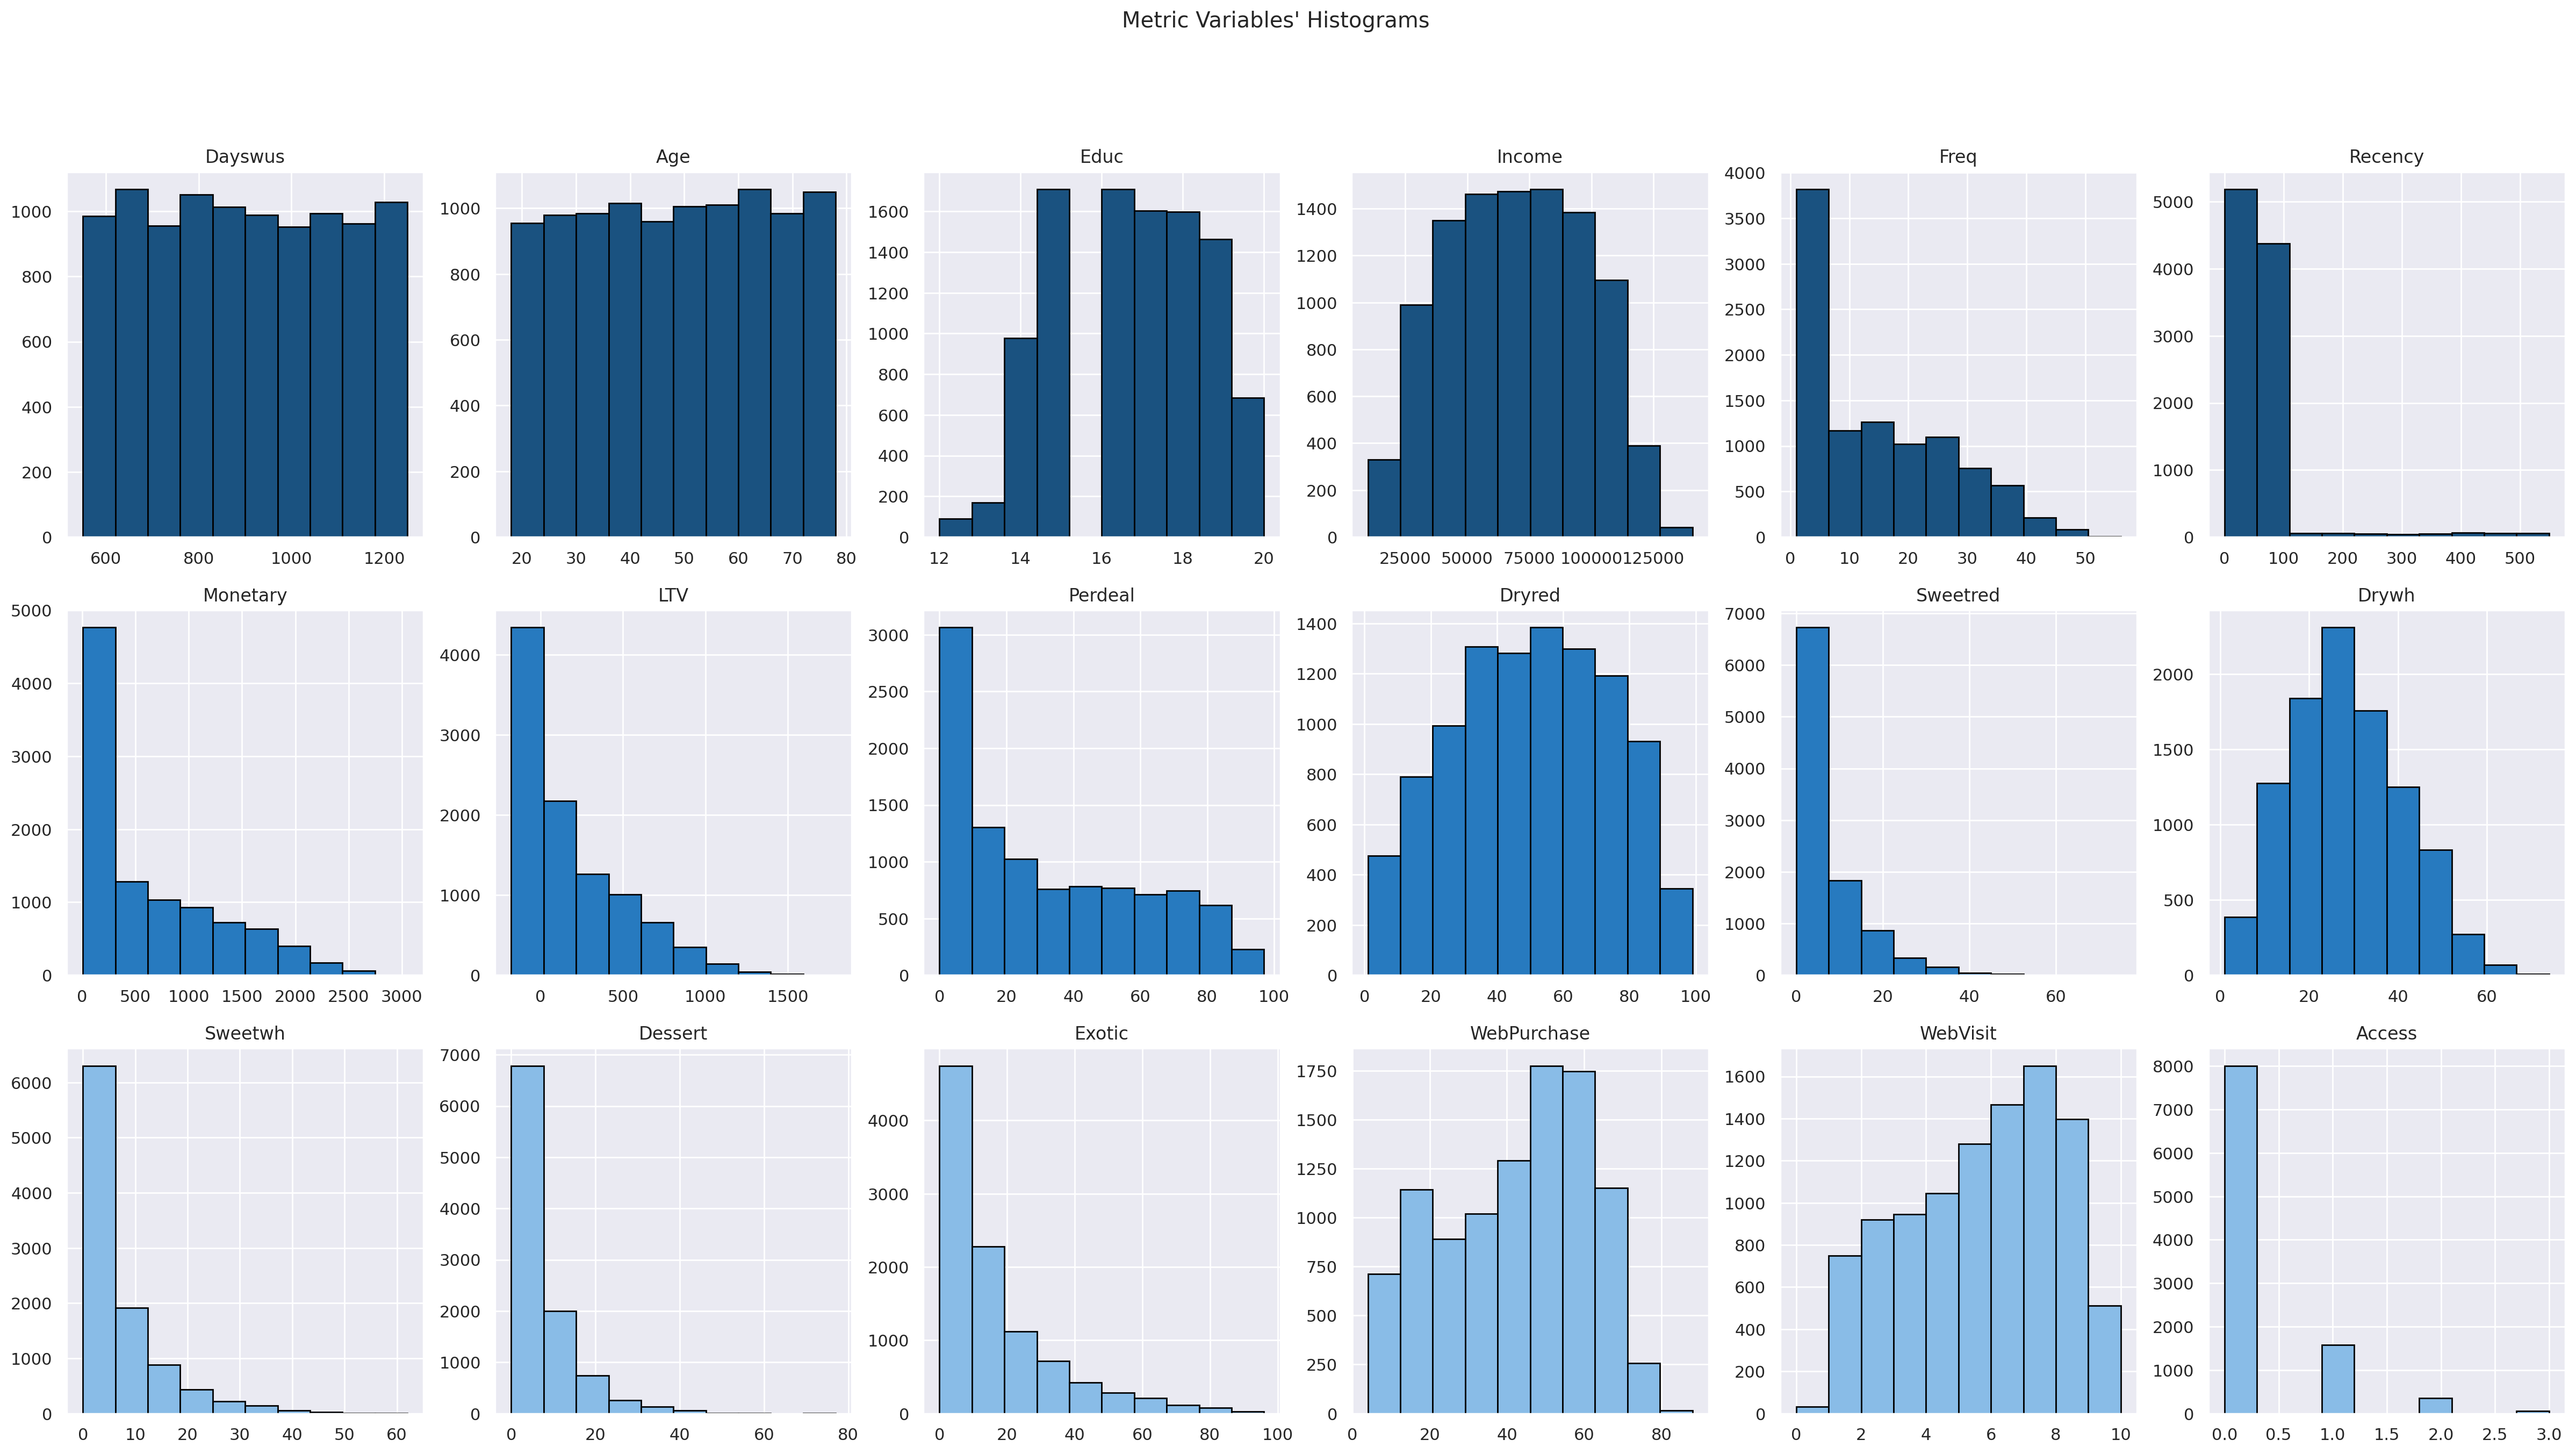

In [15]:
# All Variables' histograms in one figure

plot_multiple_histograms(df,metric)

<hr>
<a class="anchor" name="outliers">
    
# 4. Outlier removal
    
</a>


In [16]:
# Define a function that plots multiple box plots
def plot_multiple_boxplots(data, feats, title="Variables' Box Plots", colors=None, figsize=(30, 15)):

    fig, axes = plt.subplots(3, math.ceil(len(feats) / 3), figsize=figsize)

    if colors is None:
        colors = [(26/255, 82/255, 128/255), (26/255, 82/255, 128/255), (26/255, 82/255, 128/255), (26/255, 82/255, 128/255), (26/255, 82/255, 128/255), (26/255, 82/255, 128/255),
                  (39/255, 122/255, 191/255), (39/255, 122/255, 191/255), (39/255, 122/255, 191/255), (39/255, 122/255, 191/255), (39/255, 122/255, 191/255), (39/255, 122/255, 191/255),
                  (137/255, 188/255, 231/255), (137/255, 188/255, 231/255), (137/255, 188/255, 231/255), (137/255, 188/255, 231/255), (137/255, 188/255, 231/255), (137/255, 188/255, 231/255)]

    for (ax, feat, color) in zip(axes.flatten(), feats, colors):
        sns.boxplot(x=data[feat], ax=ax, color=color)
        ax.set_title(feat)
        ax.set_xlabel("")

    plt.suptitle(title)
    plt.show()

    return

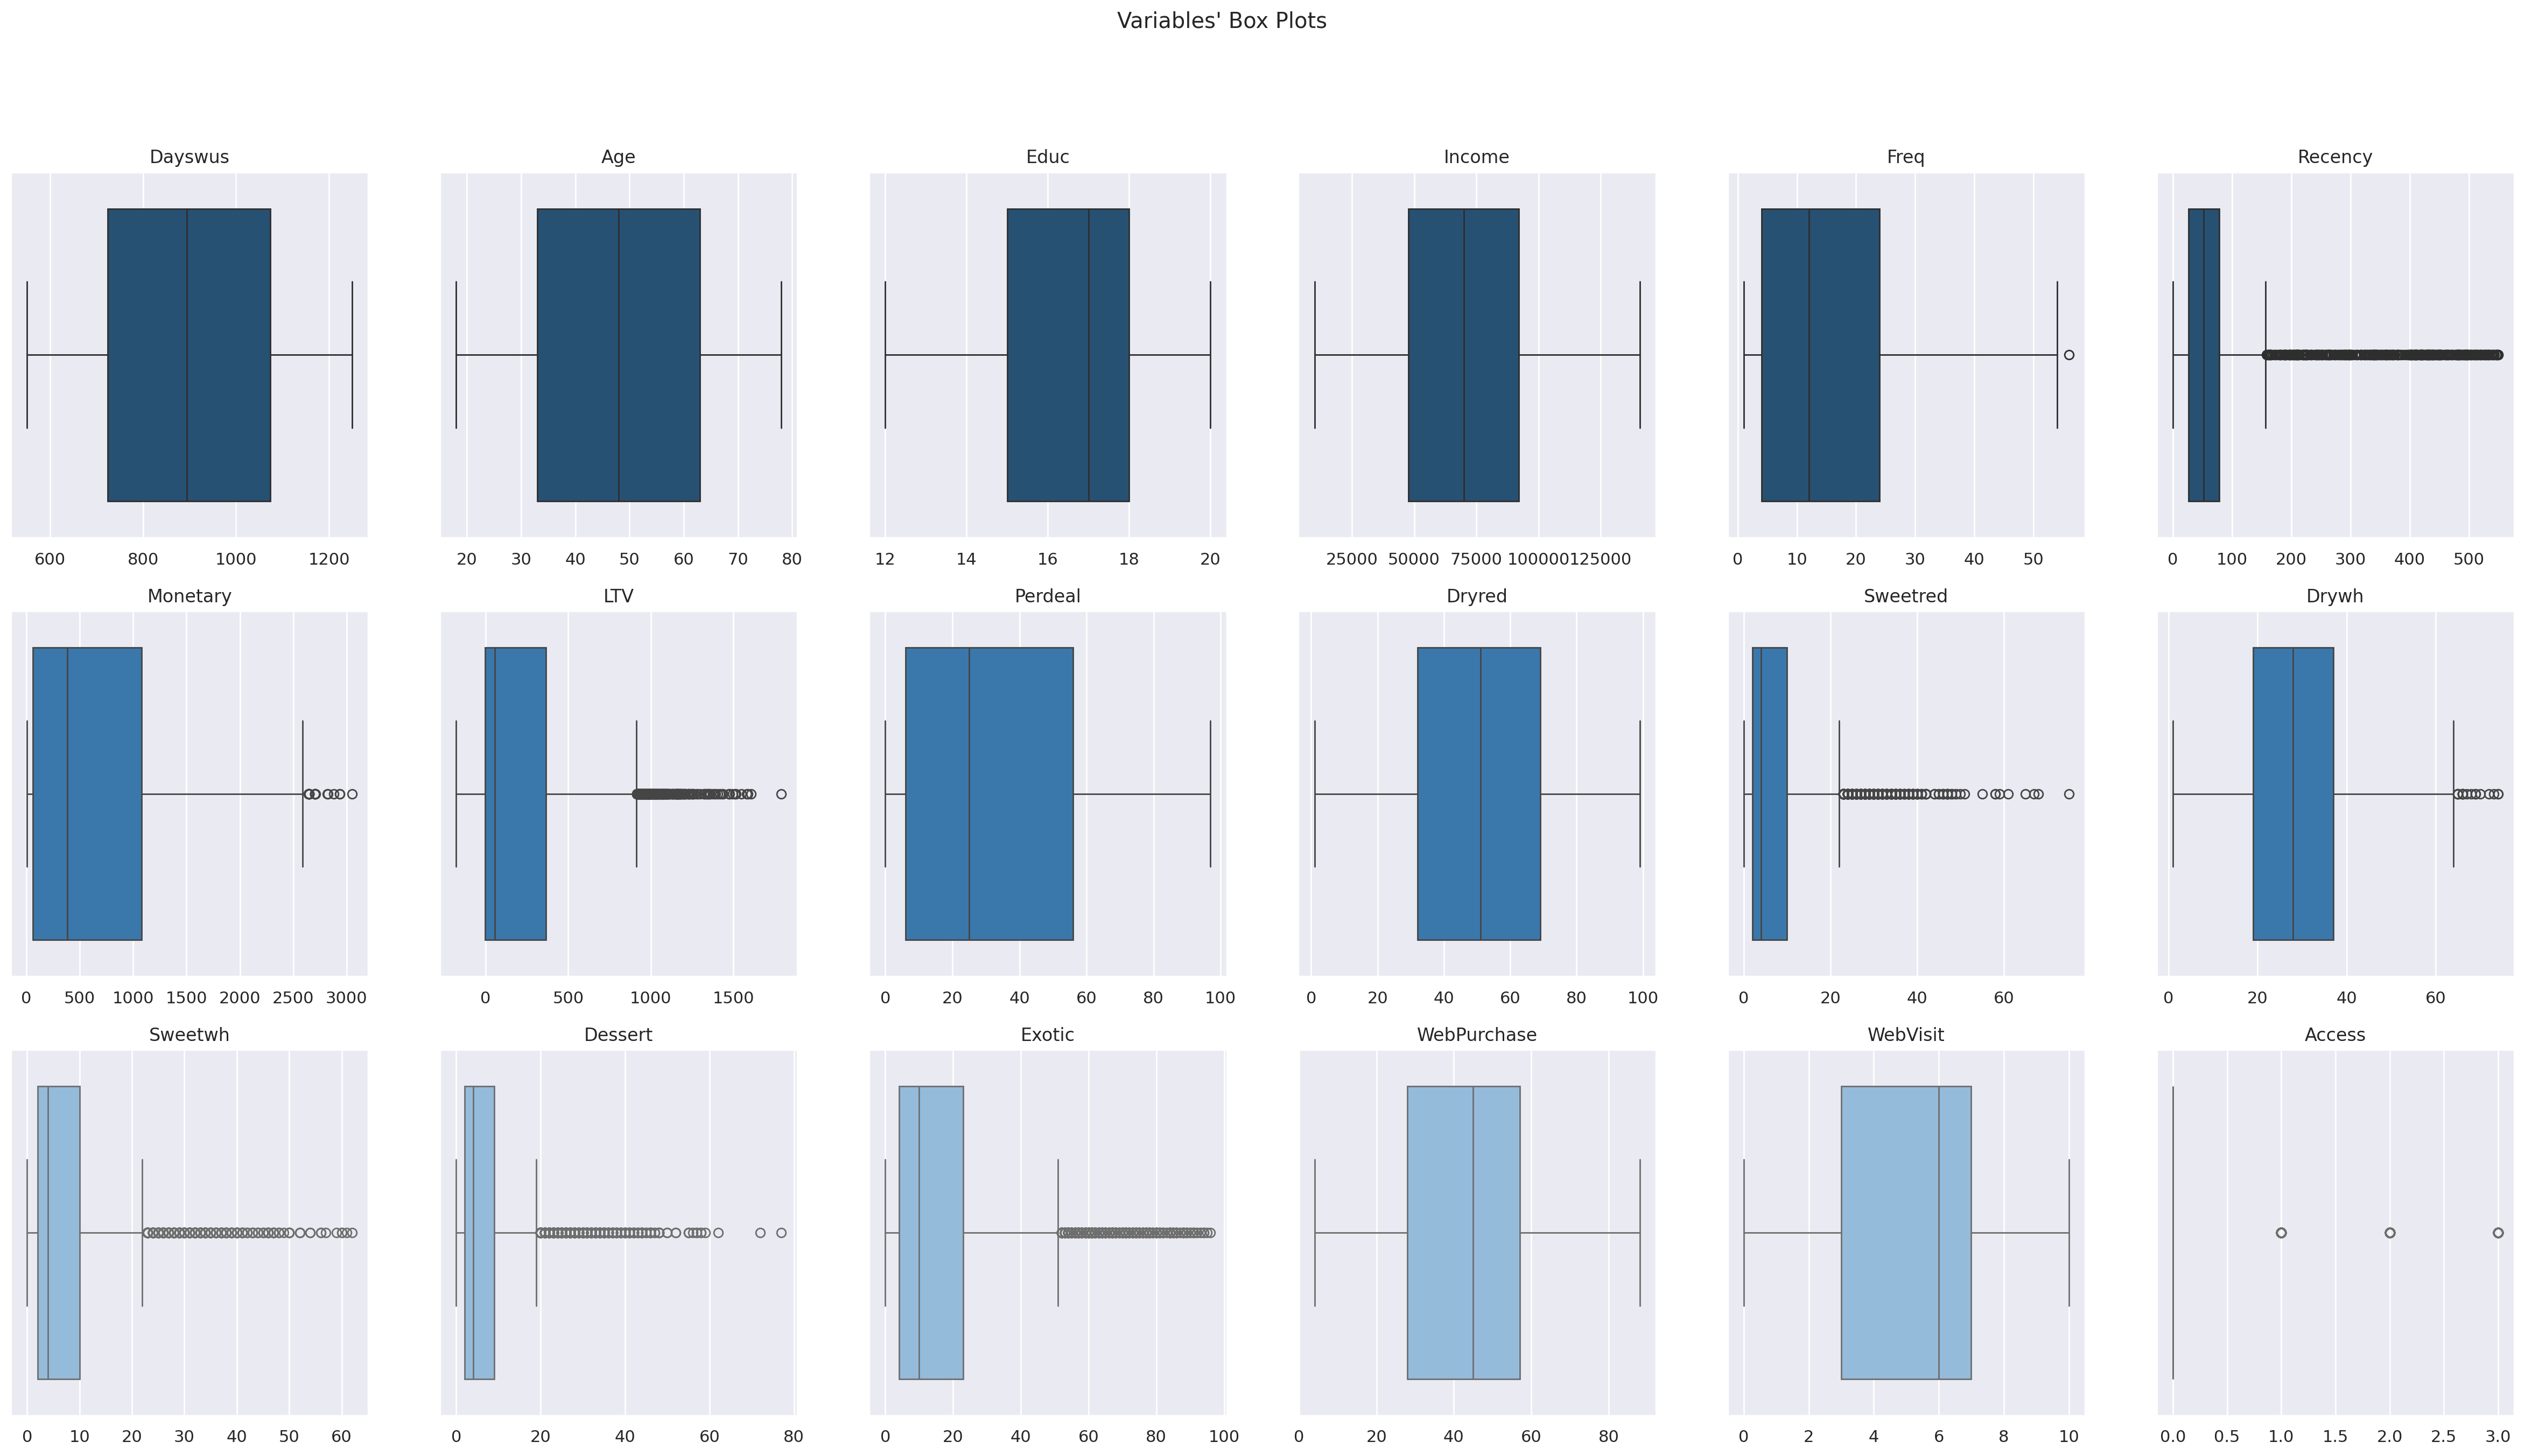

In [17]:
# All Variables' Histograms in one figure

plot_multiple_boxplots(df,metric)

In [18]:
# Create a function to define outliers

def get_iqr_filters(df, feats, lower_q=.25, upper_q=.75):
    q25 = df[feats].quantile(lower_q)
    q75 = df[feats].quantile(upper_q)
    iqr = (q75 - q25)

    upper_lim = q75 + 1.5 * iqr
    lower_lim = q25 - 1.5 * iqr

    iqr_filters = []
    for metric in feats:
        llim = lower_lim[metric]
        ulim = upper_lim[metric]
        iqr_filters.append(df[metric].between(llim, ulim, inclusive='both'))

    filters = pd.Series(np.all(iqr_filters, 0))

    return filters

selected_feats = ['Monetary', 'LTV', 'Freq']

filters_IQR = get_iqr_filters(df, selected_feats)

In [19]:
df_1 = df[(filters_IQR)]
print('Percentage of data kept after removing outliers both manually and using IQR method:', 100*(np.round(df_1.shape[0] / df.shape[0], 4)))

Percentage of data kept after removing outliers both manually and using IQR method: 96.73


In [20]:
# Manual removal of outliers

manual_filters = (
    (df_1['Sweetred'] < 55) &
    (df_1['Dessert'] < 55)
)

df_1_manual = df_1[manual_filters]
print('Percentage of data kept after removing outliers manually:', 100*(np.round(df_1_manual.shape[0] / df.shape[0], 4)))

Percentage of data kept after removing outliers manually: 96.52


In [21]:
df_2=df_1_manual.copy()

<hr>
<a class="anchor" name="features">
    
# 5. Feature engineering and selection
    
</a>


In [22]:
# Variable redundancy: combine Kidhome and Teenhome into one variable only
# Create a 2x2 matrix of frequencies
contingency_table = pd.crosstab(df_2['Kidhome'], df_2['Teenhome'])

# Display the contingency table
print(contingency_table)

# Create new feature that considers if the customer has children at home, either kids or teens
df_2['Childhome'] = (df_2['Kidhome'] | df_2['Teenhome']).astype(bool)

Child_freq = df_2['Childhome'].value_counts()

# Display the frequency table
# We can see that the number of false cases is the same, but the true cases account for all the true cases that we had before for both teens and kids
print(Child_freq)

Teenhome  False  True 
Kidhome               
False      2634   2850
True       2339   1829
Childhome
True     7018
False    2634
Name: count, dtype: int64


In [23]:
df_2.drop(columns=['Kidhome','Teenhome'], inplace=True)

In [24]:
# Look the data types again, to check if the previous change was achieved
df_2.dtypes

,0
Custid,int64
Dayswus,int64
Age,int64
Educ,int64
Income,int64
Freq,int64
Recency,int64
Monetary,int64
LTV,int64
Perdeal,int64


In [25]:
# Define a function that plots a correlation matrix

def plot_corr_matrix(df_2, feats, title="Correlation Matrix", method="pearson", figsize=(30,15)):

  fig = plt.figure(figsize=figsize)

  corr = np.round(df_2[feats].corr(method=method), decimals=2)

  mask_annot = np.absolute(corr.values) >= 0.5
  annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

  sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True),
              fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

  fig.subplots_adjust(top=0.95)
  fig.suptitle(title, fontsize=20)

  plt.show()

  return

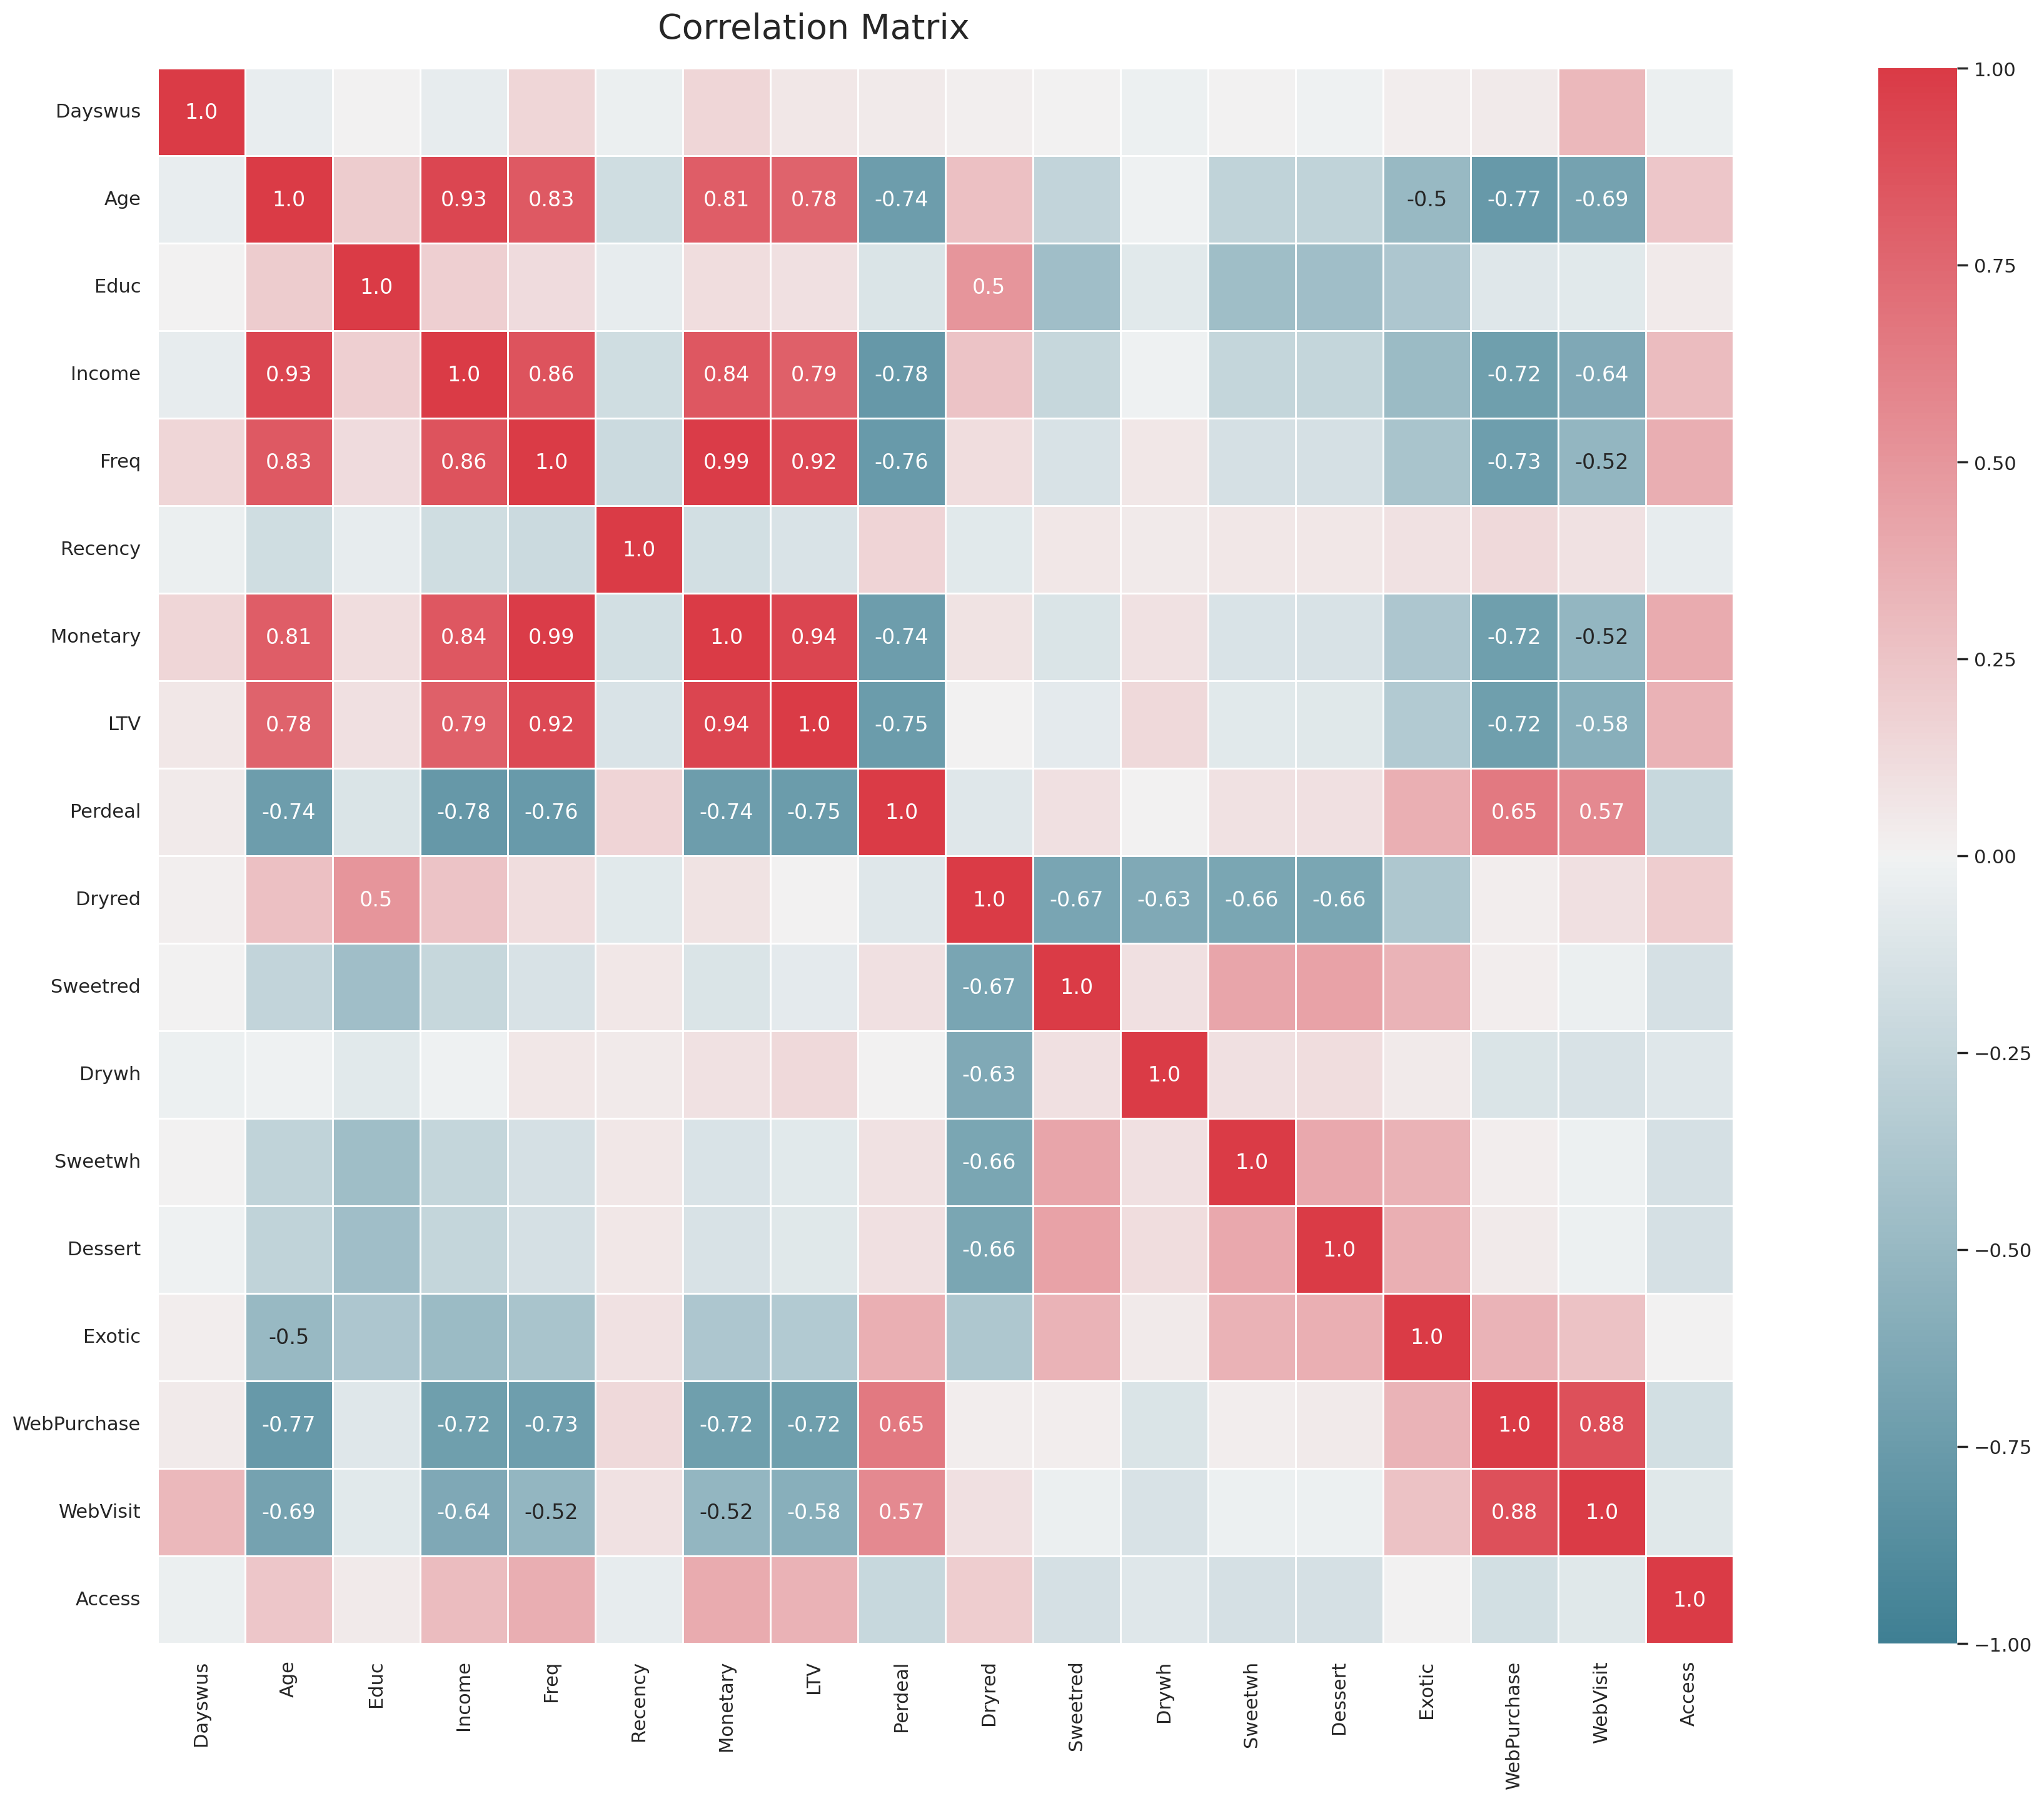

In [26]:
plot_corr_matrix(df_2, metric)

In [27]:
# Freq and monetary present an equal correlation behaviour and are highly correlated between them. We created a new variable, the average value of each purchase, by dividing monetary by frequency.

df_2['AvgPurch']=df_2['Monetary']/df_2['Freq']

In [28]:
# Select variables according to their correlations

df_2.drop(columns=['Dayswus', 'Freq', 'Recency', 'Monetary', 'LTV', 'WebVisit', 'Access'],inplace=True)

In [29]:
# we need to update our metric list of variables:

metric.remove("Dayswus")
metric.remove("Recency")
metric.remove("Freq")
metric.remove("Monetary")
metric.remove("LTV")
metric.remove("WebVisit")
metric.remove("Access")
metric.append('AvgPurch')

In [30]:
df_2.head().round(2)

,Custid,Age,Educ,Income,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,Childhome,AvgPurch
0,1001,68,16,90782,3,37,5,44,10,3,2,19,False,48.34
1,1002,78,20,113023,1,55,1,38,4,2,2,9,False,49.58
2,1003,24,18,28344,66,32,19,24,1,24,63,59,True,11.00
3,1004,59,19,93571,12,60,10,19,6,5,15,35,True,42.29
4,1005,59,18,91852,5,59,5,28,4,4,19,34,True,45.52


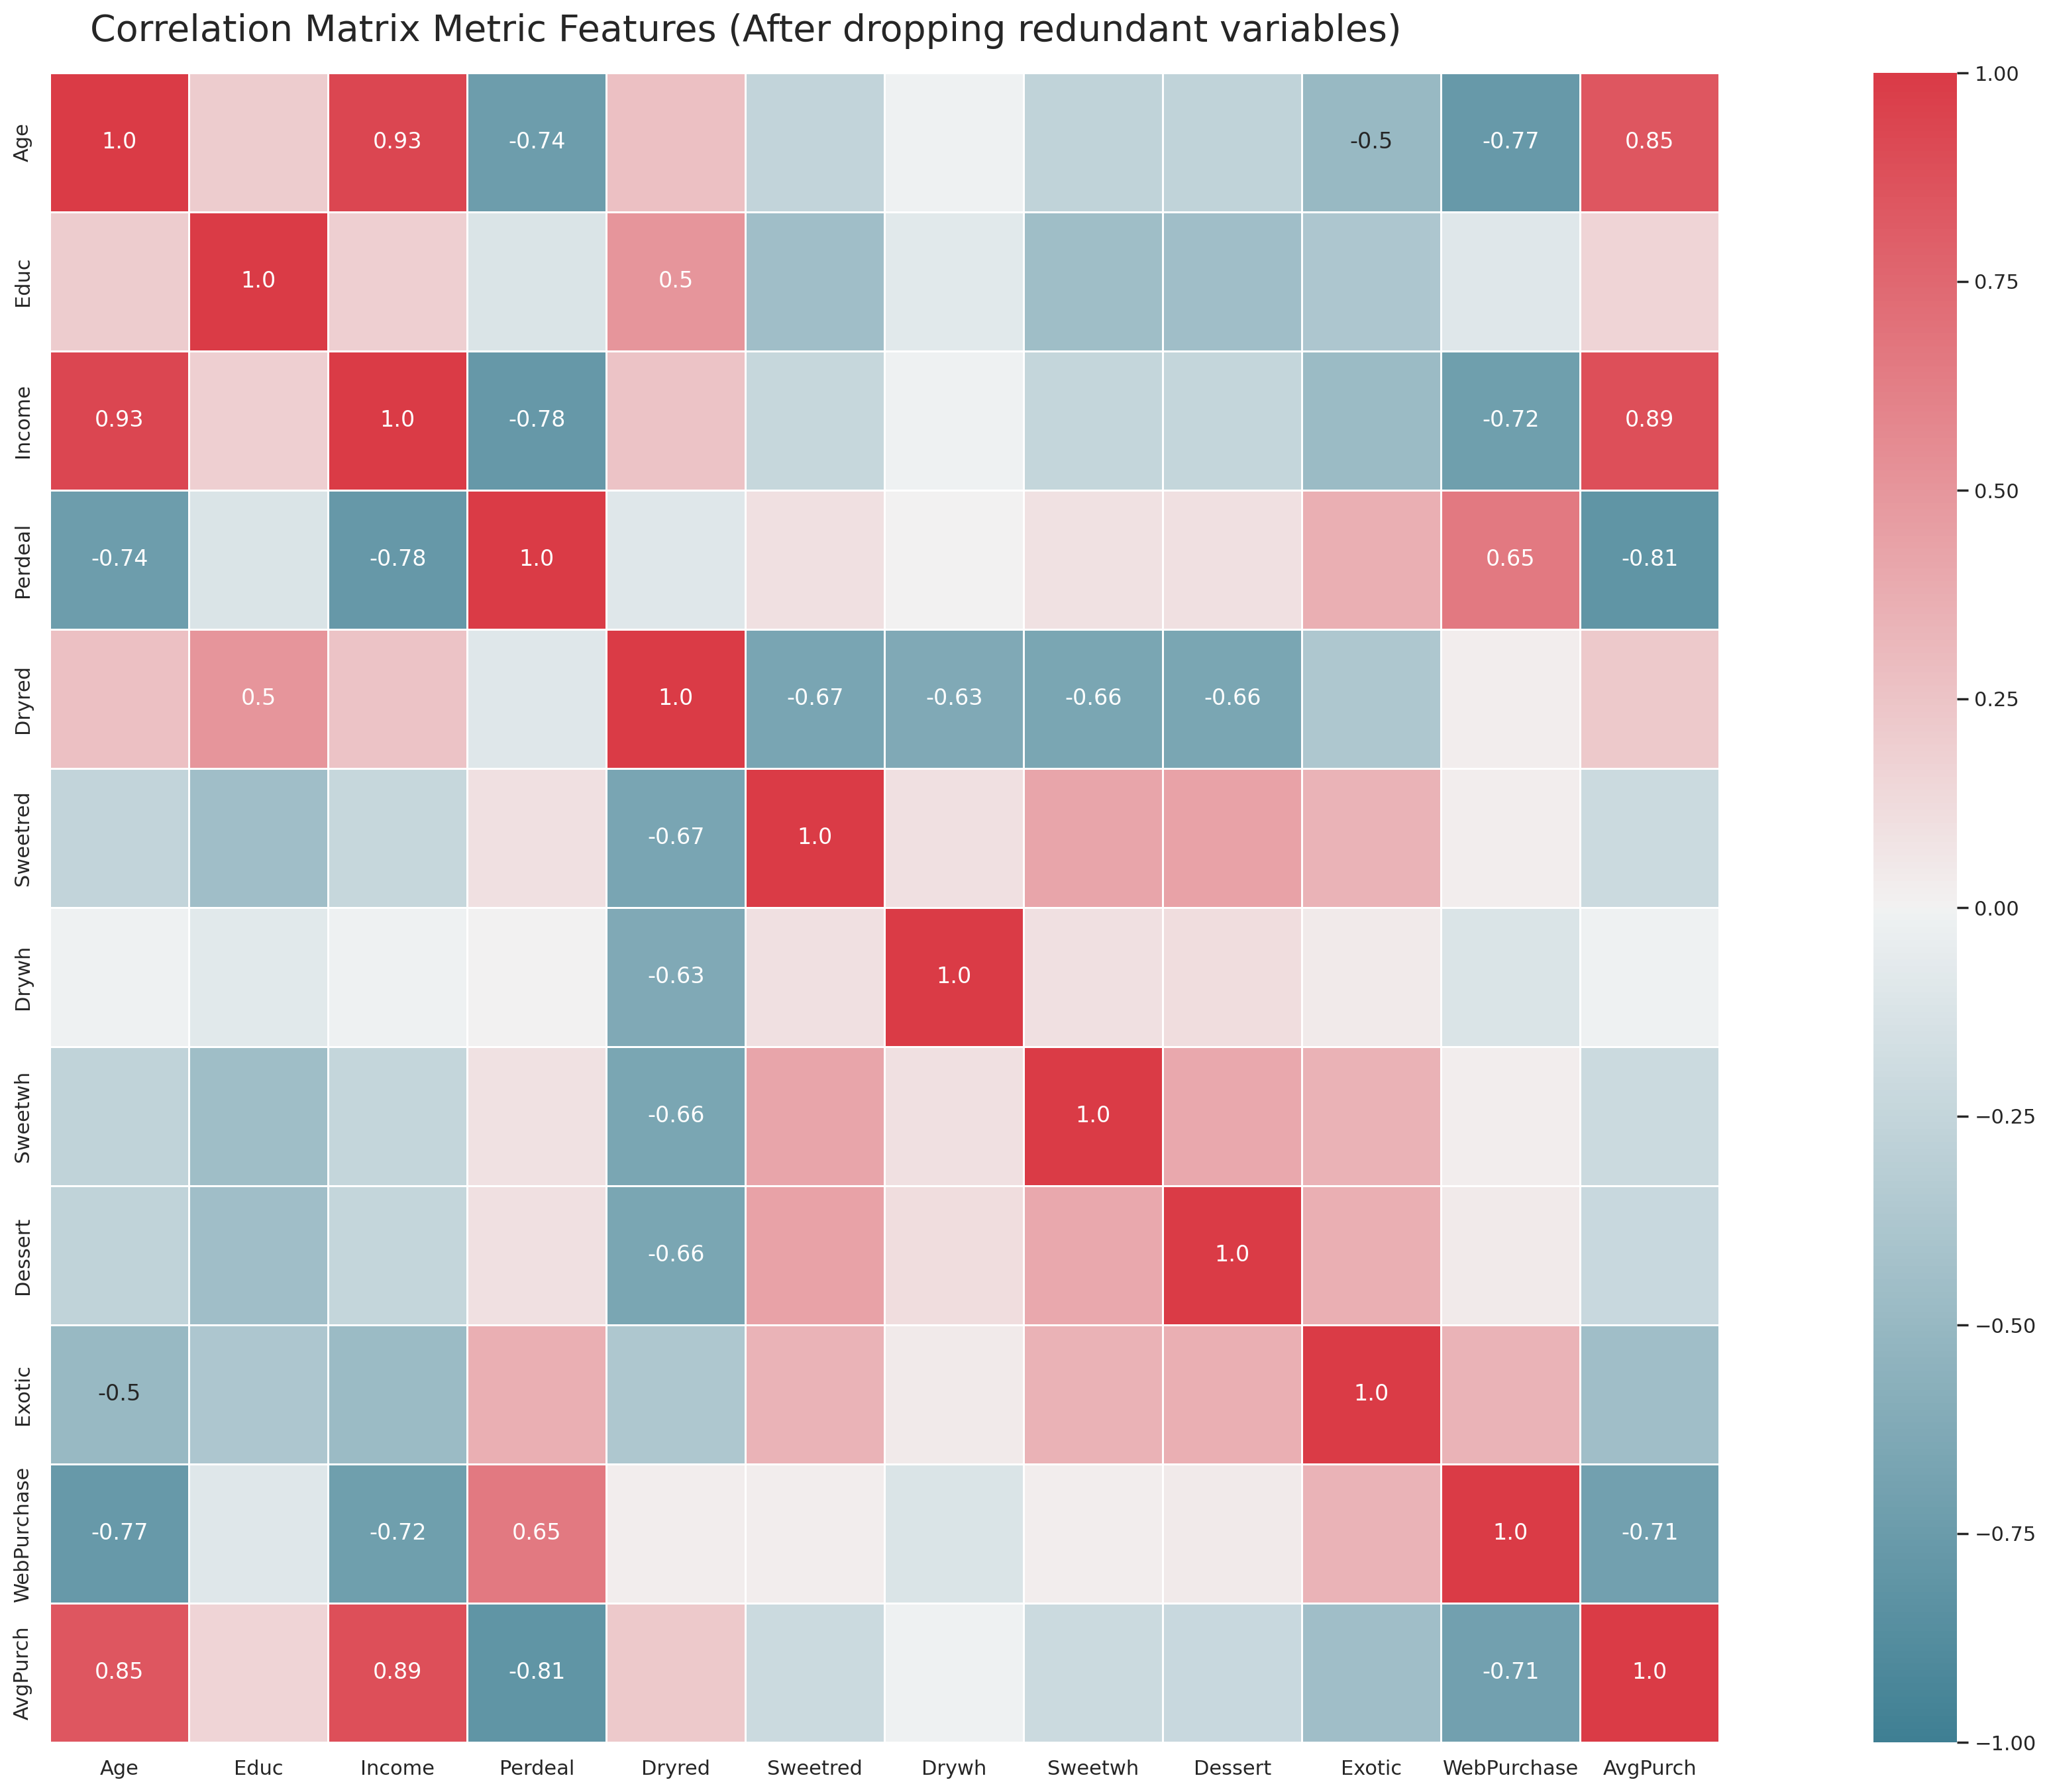

In [31]:
plot_corr_matrix(df_2, metric, "Correlation Matrix Metric Features (After dropping redundant variables)")

<hr>
<a class="anchor" name="normalization">
    
# 6. Data Normalization
    
</a>

In [32]:
#Normalizing the data
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(df_2[metric])
scaled_feat

array([[0.83333333, 0.5       , 0.62269329, ..., 0.02083333, 0.1686747 ,
        0.88333408],
       [1.        , 1.        , 0.79413397, ..., 0.02083333, 0.04819277,
        0.90911385],
       [0.1       , 0.75      , 0.14140137, ..., 0.65625   , 0.65060241,
        0.10430248],
       ...,
       [0.85      , 0.875     , 0.69088106, ..., 0.04166667, 0.15662651,
        0.89630595],
       [0.78333333, 0.25      , 0.77867879, ..., 0.08333333, 0.37349398,
        0.88061091],
       [0.03333333, 0.25      , 0.12630078, ..., 0.65625   , 0.56626506,
        0.11473272]])

In [33]:
df_2[metric]=scaled_feat
df_2.drop(columns=['Custid'],inplace=True)
df_2.head()

,Age,Educ,Income,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,Childhome,AvgPurch
0,0.833333,0.500,0.622693,0.030928,0.367347,0.098039,0.589041,0.161290,0.057692,0.020833,0.168675,False,0.883334
1,1.000000,1.000,0.794134,0.010309,0.551020,0.019608,0.506849,0.064516,0.038462,0.020833,0.048193,False,0.909114
2,0.100000,0.750,0.141401,0.680412,0.316327,0.372549,0.315068,0.016129,0.461538,0.656250,0.650602,True,0.104302
3,0.683333,0.875,0.644192,0.123711,0.602041,0.196078,0.246575,0.096774,0.096154,0.156250,0.361446,True,0.756938
4,0.683333,0.750,0.630941,0.051546,0.591837,0.098039,0.369863,0.064516,0.076923,0.197917,0.349398,True,0.824407


<hr>
<a class="anchor" name="clustering">
    
# 7. Clustering Algorithms
    
</a>

<hr>
<a class="anchor" name="k_means">
    
# 7.1. K Means
    
</a>

In [34]:
def cluster_profiles(df_test,
                     label_columns,
                     figsize,
                     compar_titles=None,
                     colors='Set1'):

    if compar_titles == None:
        compar_titles = [""]*len(label_columns)

    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2,
                             figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):

        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df_test.drop(drop_cols, axis=1)

        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]

        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label,
                                         color=sns.color_palette(palette=colors), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1],
                    palette=sns.color_palette(palette=colors))

        # Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy')
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)

    plt.subplots_adjust(hspace=0.4, wspace=0.3, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

<hr>
<a class="anchor" name="k_means_client">
    
# 7.1.1. Client Clusters
    
</a>

In [35]:
# Analysing the cluster considering only the customer caracterization
Client_variables = ['Educ', 'Income', 'AvgPurch', 'WebPurchase', 'Perdeal', 'Childhome']
df_client=df_2[Client_variables]

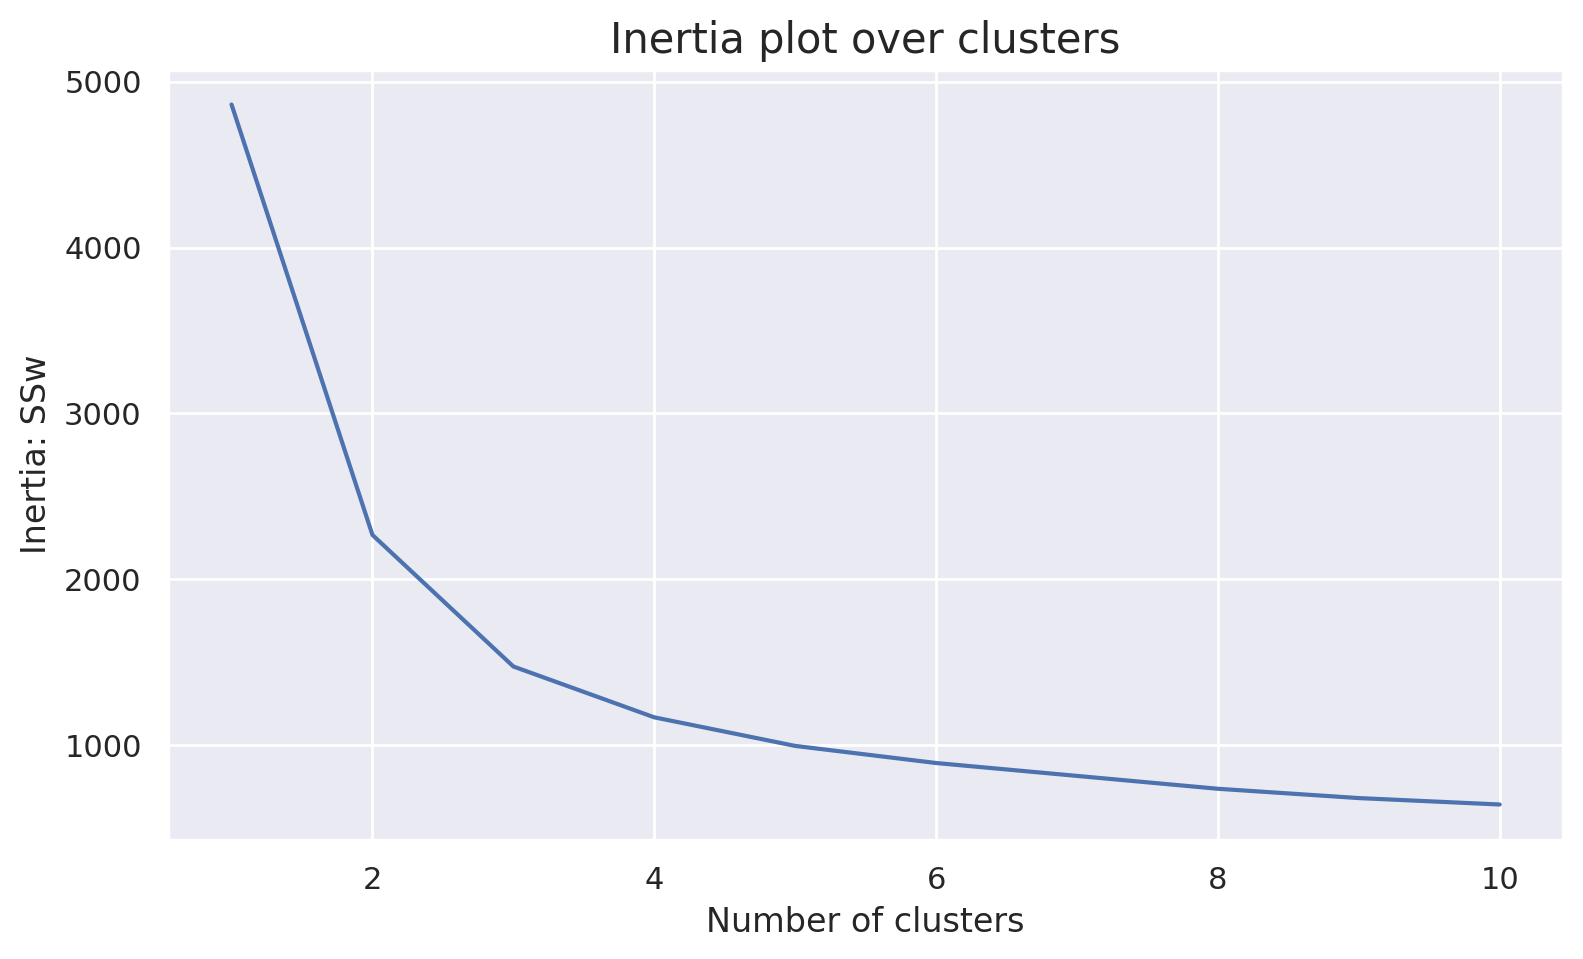

In [36]:
range_clusters = range(1, 11)

inertia = []
for n_clus in range_clusters:
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(df_client)
    inertia.append(kmclust.inertia_)

plt.figure(figsize=(9,5))
plt.plot(range_clusters, inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

In [37]:
# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    if nclus == 1:
        continue

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(df_client)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df_client, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

For n_clusters = 2, the average silhouette_score is : 0.5255285214308646
For n_clusters = 3, the average silhouette_score is : 0.4206248098971312
For n_clusters = 4, the average silhouette_score is : 0.4302272822246252
For n_clusters = 5, the average silhouette_score is : 0.3682000689336256
For n_clusters = 6, the average silhouette_score is : 0.3323207043896718
For n_clusters = 7, the average silhouette_score is : 0.3269106953204051
For n_clusters = 8, the average silhouette_score is : 0.2805981390638777
For n_clusters = 9, the average silhouette_score is : 0.2722045111601672
For n_clusters = 10, the average silhouette_score is : 0.2719860222791411


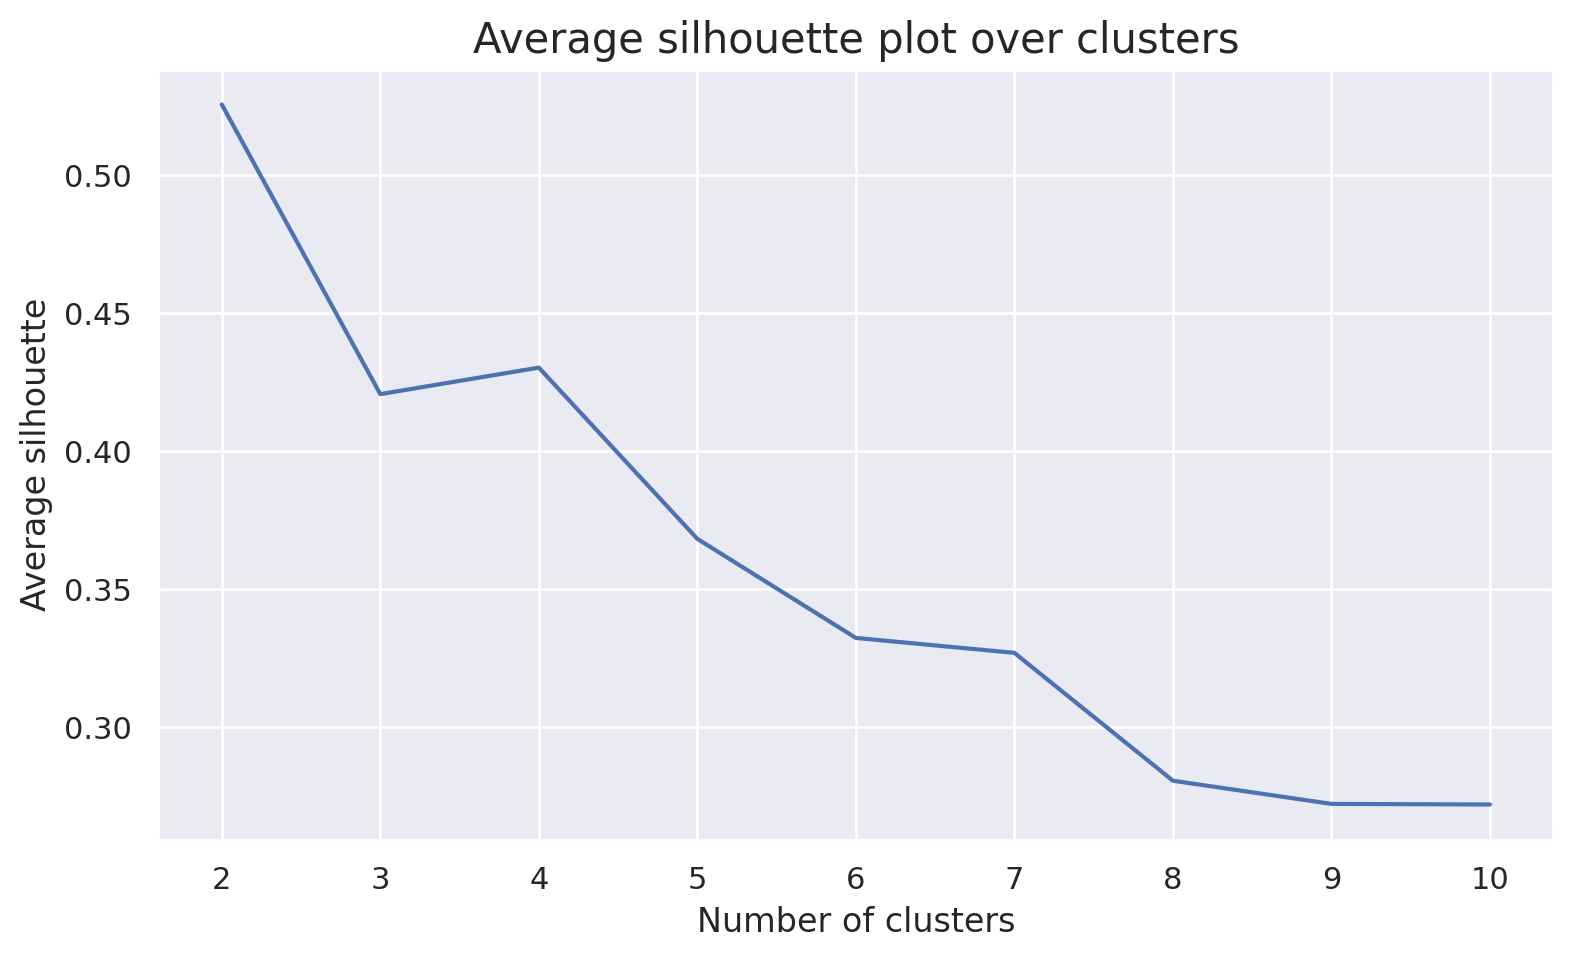

In [38]:
# The average silhouette plot

plt.figure(figsize=(9,5))
plt.plot(range_clusters[1:], avg_silhouette)
plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.show()

In [39]:
# Final cluster solution
number_clusters = 4
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_labels = kmclust.fit_predict(df_client)
clusterCount = np.bincount(km_labels)
print(clusterCount)

[3196 2093 3822  541]


In [40]:
# Characterizing the final clusters
df_concat = pd.concat((df_client, pd.Series(km_labels, name='labels', index=df_client.index)), axis=1)
df_concat.groupby('labels').mean()

,Educ,Income,AvgPurch,WebPurchase,Perdeal,Childhome
labels,,,,,,
0,0.633644,0.545393,0.660006,0.443902,0.210211,1.0
1,0.624224,0.688766,0.857703,0.168554,0.027076,0.0
2,0.559131,0.274207,0.263419,0.620419,0.642115,1.0
3,0.457255,0.229057,0.333587,0.557402,0.259466,0.0


In [41]:
df_client_chrc = pd.concat((df_2, pd.Series(km_labels, name='labels_client', index=df_client.index)), axis=1)
df_client_chrc.head()

,Age,Educ,Income,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,Childhome,AvgPurch,labels_client
0,0.833333,0.500,0.622693,0.030928,0.367347,0.098039,0.589041,0.161290,0.057692,0.020833,0.168675,False,0.883334,1
1,1.000000,1.000,0.794134,0.010309,0.551020,0.019608,0.506849,0.064516,0.038462,0.020833,0.048193,False,0.909114,1
2,0.100000,0.750,0.141401,0.680412,0.316327,0.372549,0.315068,0.016129,0.461538,0.656250,0.650602,True,0.104302,2
3,0.683333,0.875,0.644192,0.123711,0.602041,0.196078,0.246575,0.096774,0.096154,0.156250,0.361446,True,0.756938,0
4,0.683333,0.750,0.630941,0.051546,0.591837,0.098039,0.369863,0.064516,0.076923,0.197917,0.349398,True,0.824407,0


/tmp/ipython-input-2919671818.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label, y="counts", data=counts, ax=ax[1],
/tmp/ipython-input-2919671818.py:26: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(x=label, y="counts", data=counts, ax=ax[1],
/tmp/ipython-input-2919671818.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(cluster_labels)


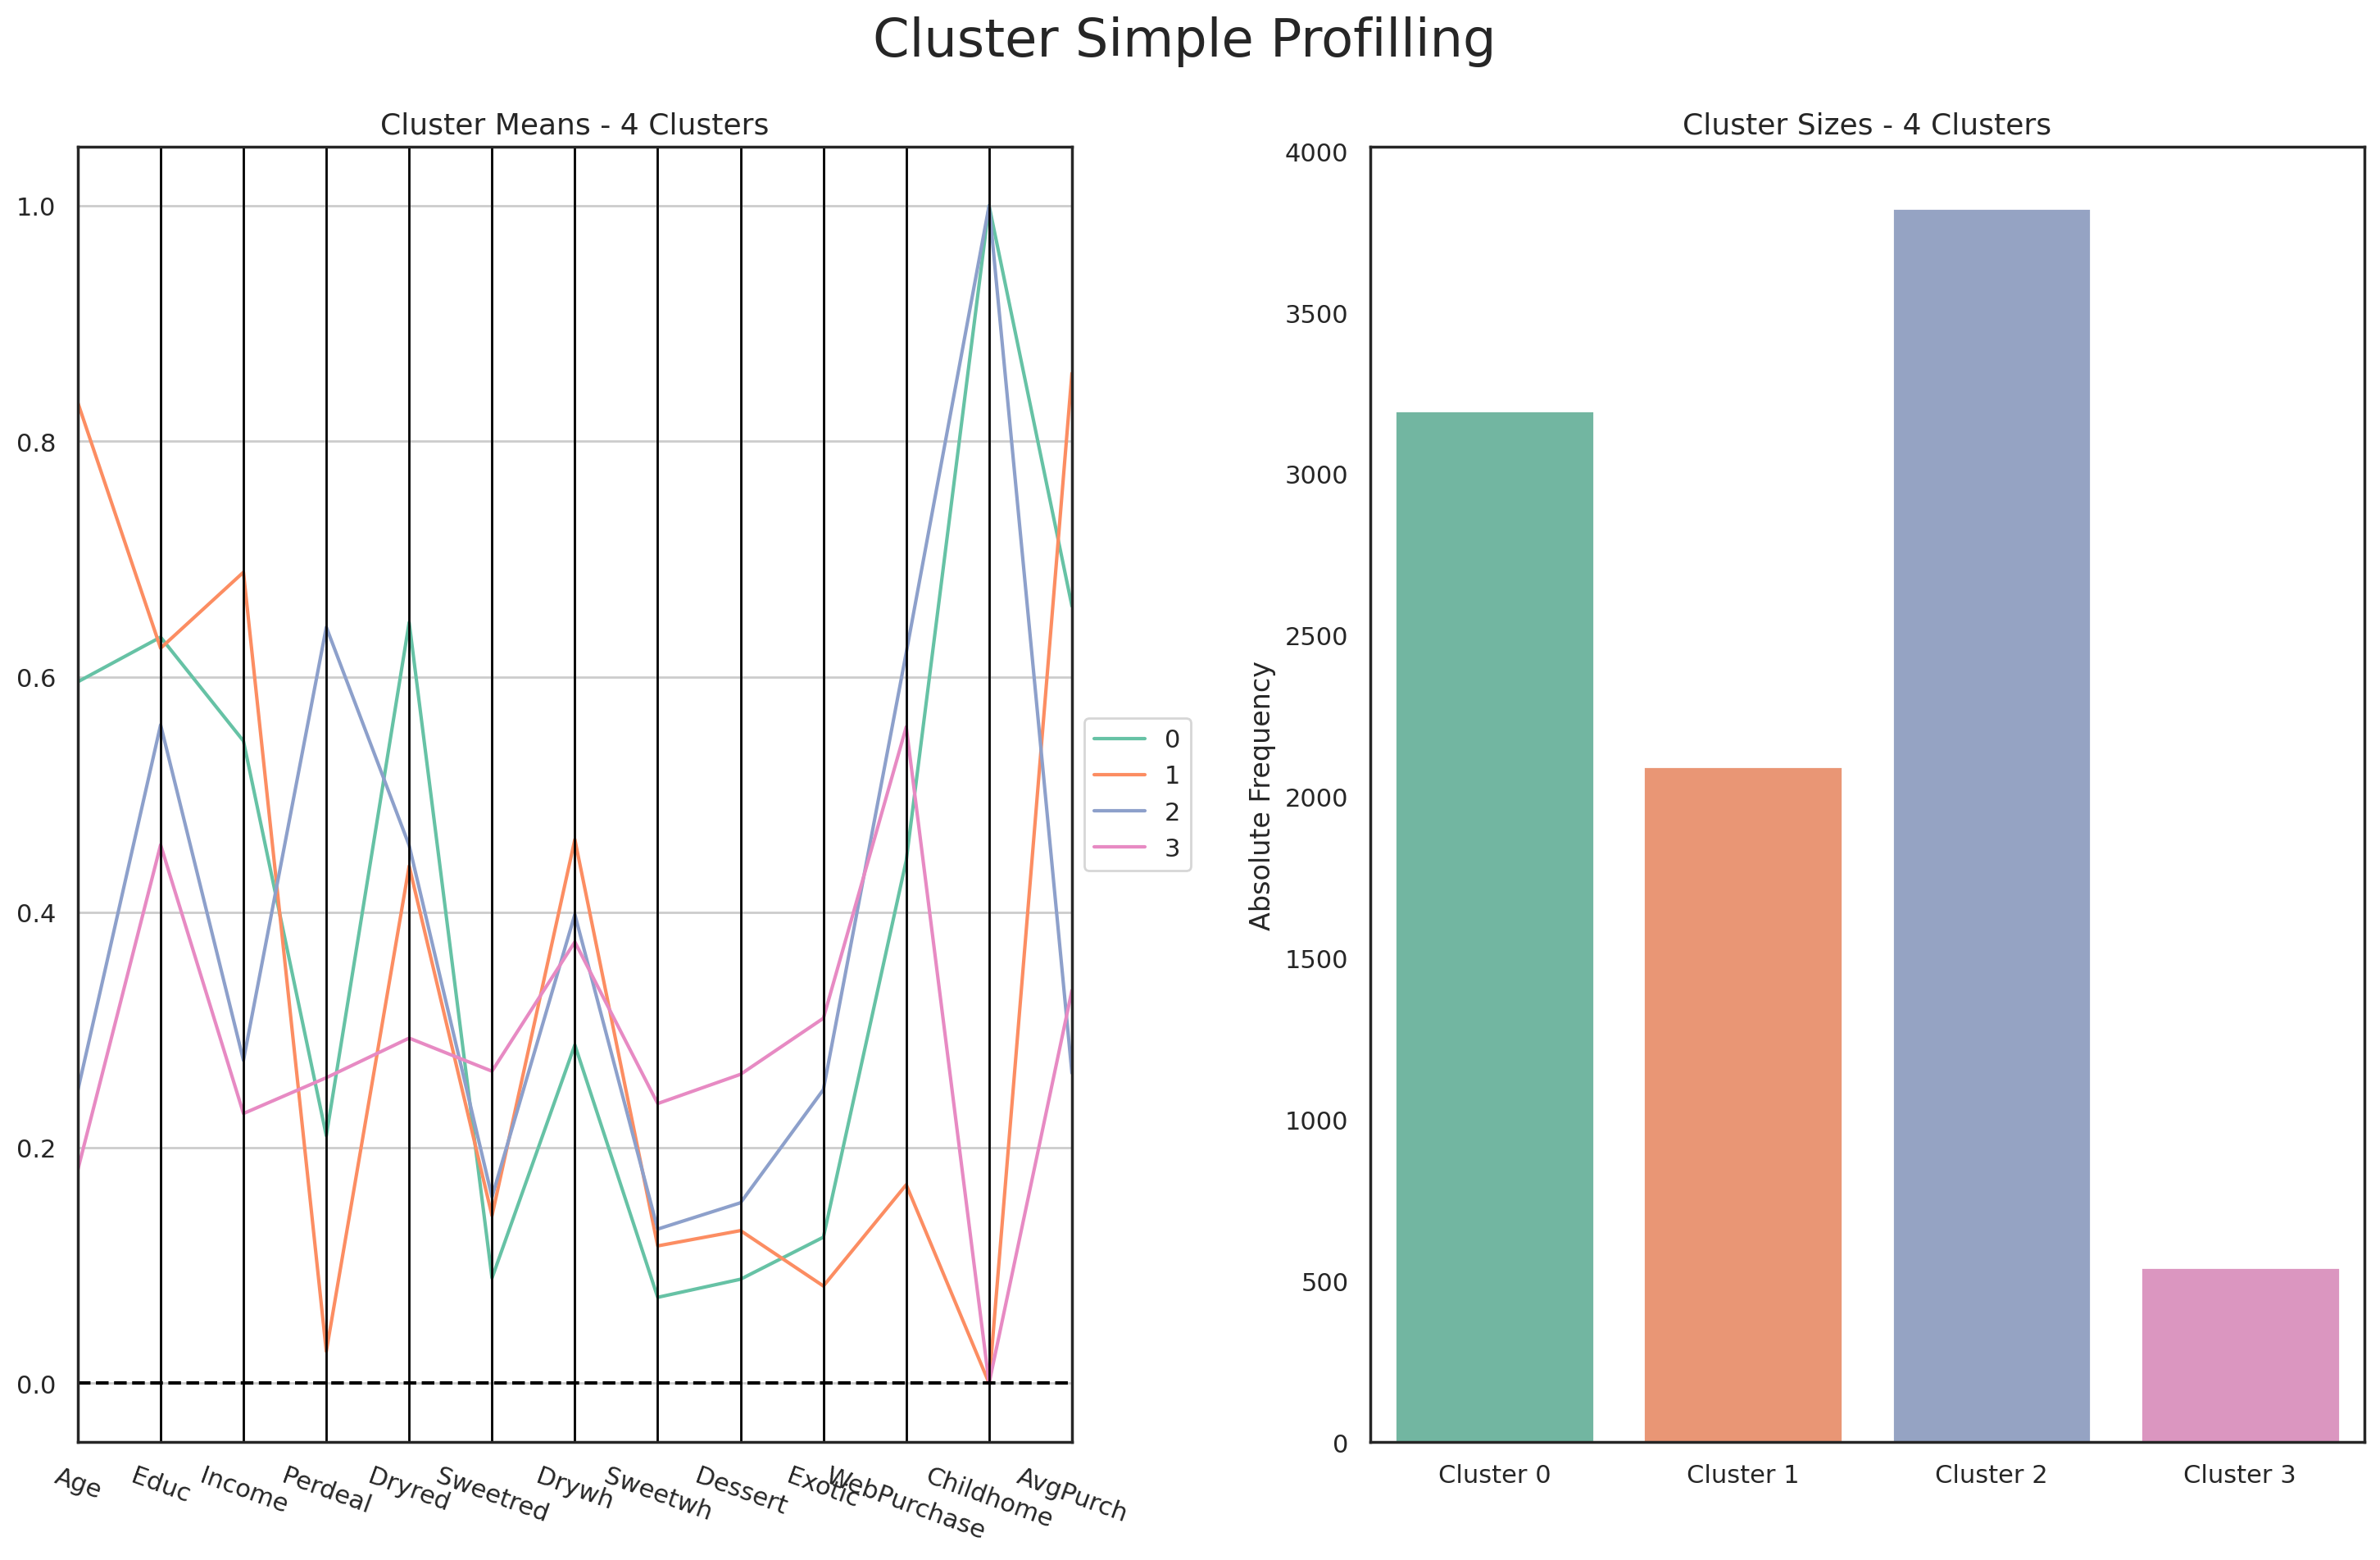

In [42]:
sns.set(style="white")
cluster_profiles(
    df_test = df_client_chrc,
    figsize = (18, 10),
    label_columns=['labels_client'],
    colors='Set2'
)

<hr>
<a class="anchor" name="k_means_wine">
    
# 7.1.2. Wine Clusters
    
</a>

In [43]:
# Analysing the cluster considering the wine type
Wine_variables = ['Dryred', 'Sweetred', 'Drywh', 'Sweetwh', 'Dessert', 'Exotic']
df_wine=df_2[Wine_variables]

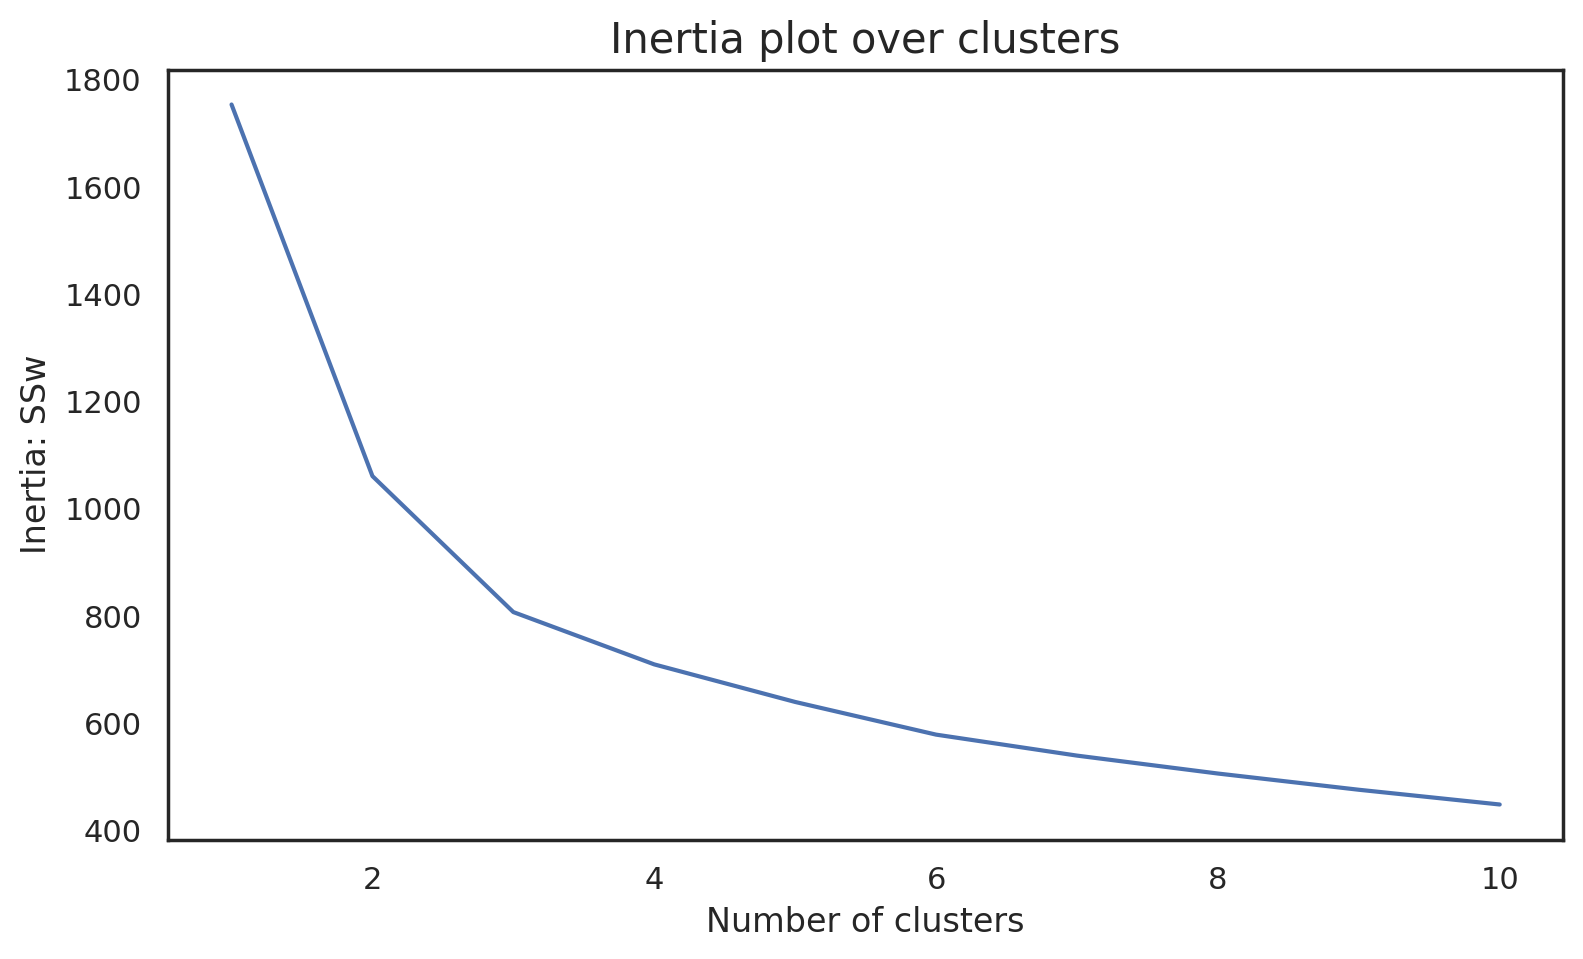

In [44]:
range_clusters = range(1, 11)

inertia = []
for n_clus in range_clusters:
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(df_wine)
    inertia.append(kmclust.inertia_)

plt.figure(figsize=(9,5))
plt.plot(range_clusters, inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

In [45]:
# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    if nclus == 1:
        continue

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(df_wine)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df_wine, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

For n_clusters = 2, the average silhouette_score is : 0.358267882103281
For n_clusters = 3, the average silhouette_score is : 0.3301269902644924
For n_clusters = 4, the average silhouette_score is : 0.25462461627759
For n_clusters = 5, the average silhouette_score is : 0.25570880000225626
For n_clusters = 6, the average silhouette_score is : 0.26490902251501164
For n_clusters = 7, the average silhouette_score is : 0.27083129271002226
For n_clusters = 8, the average silhouette_score is : 0.2692500961393684
For n_clusters = 9, the average silhouette_score is : 0.2595669831514334
For n_clusters = 10, the average silhouette_score is : 0.23531215228644334


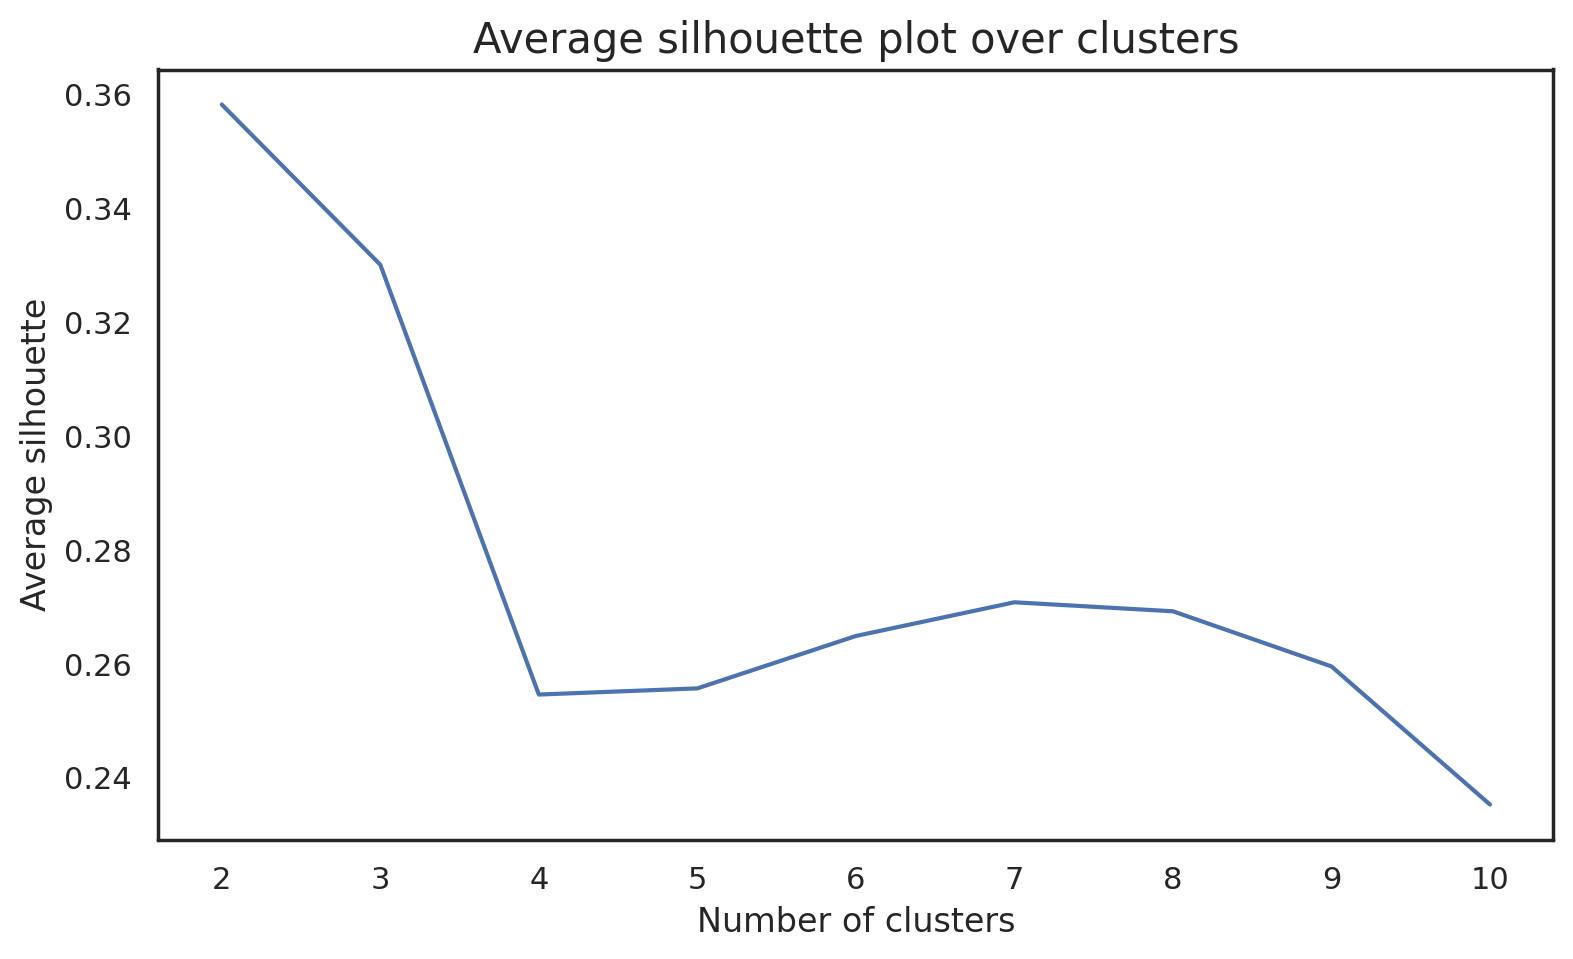

In [46]:
# The average silhouette plot

plt.figure(figsize=(9,5))
plt.plot(range_clusters[1:], avg_silhouette)
plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.show()

In [47]:
# Final cluster solution
number_clusters = 3
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_labels = kmclust.fit_predict(df_wine)
clusterCount = np.bincount(km_labels)
print(clusterCount)

[4063 1619 3970]


In [48]:
# Characterizing the final clusters
df_concat = pd.concat((df_wine, pd.Series(km_labels, name='labels', index=df_wine.index)), axis=1)
df_concat.groupby('labels').mean()

,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic
labels,,,,,,
0,0.404544,0.138606,0.506131,0.117329,0.135794,0.137537
1,0.180736,0.352808,0.370845,0.286925,0.335024,0.397287
2,0.743633,0.049588,0.240009,0.041493,0.047118,0.122888


In [49]:
df_wine_chrc = pd.concat((df_2, pd.Series(km_labels, name='labels_wine', index=df_client.index)), axis=1)
df_wine_chrc.head()

,Age,Educ,Income,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,Childhome,AvgPurch,labels_wine
0,0.833333,0.500,0.622693,0.030928,0.367347,0.098039,0.589041,0.161290,0.057692,0.020833,0.168675,False,0.883334,0
1,1.000000,1.000,0.794134,0.010309,0.551020,0.019608,0.506849,0.064516,0.038462,0.020833,0.048193,False,0.909114,0
2,0.100000,0.750,0.141401,0.680412,0.316327,0.372549,0.315068,0.016129,0.461538,0.656250,0.650602,True,0.104302,1
3,0.683333,0.875,0.644192,0.123711,0.602041,0.196078,0.246575,0.096774,0.096154,0.156250,0.361446,True,0.756938,2
4,0.683333,0.750,0.630941,0.051546,0.591837,0.098039,0.369863,0.064516,0.076923,0.197917,0.349398,True,0.824407,2


/tmp/ipython-input-2919671818.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label, y="counts", data=counts, ax=ax[1],
/tmp/ipython-input-2919671818.py:26: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(x=label, y="counts", data=counts, ax=ax[1],
/tmp/ipython-input-2919671818.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(cluster_labels)


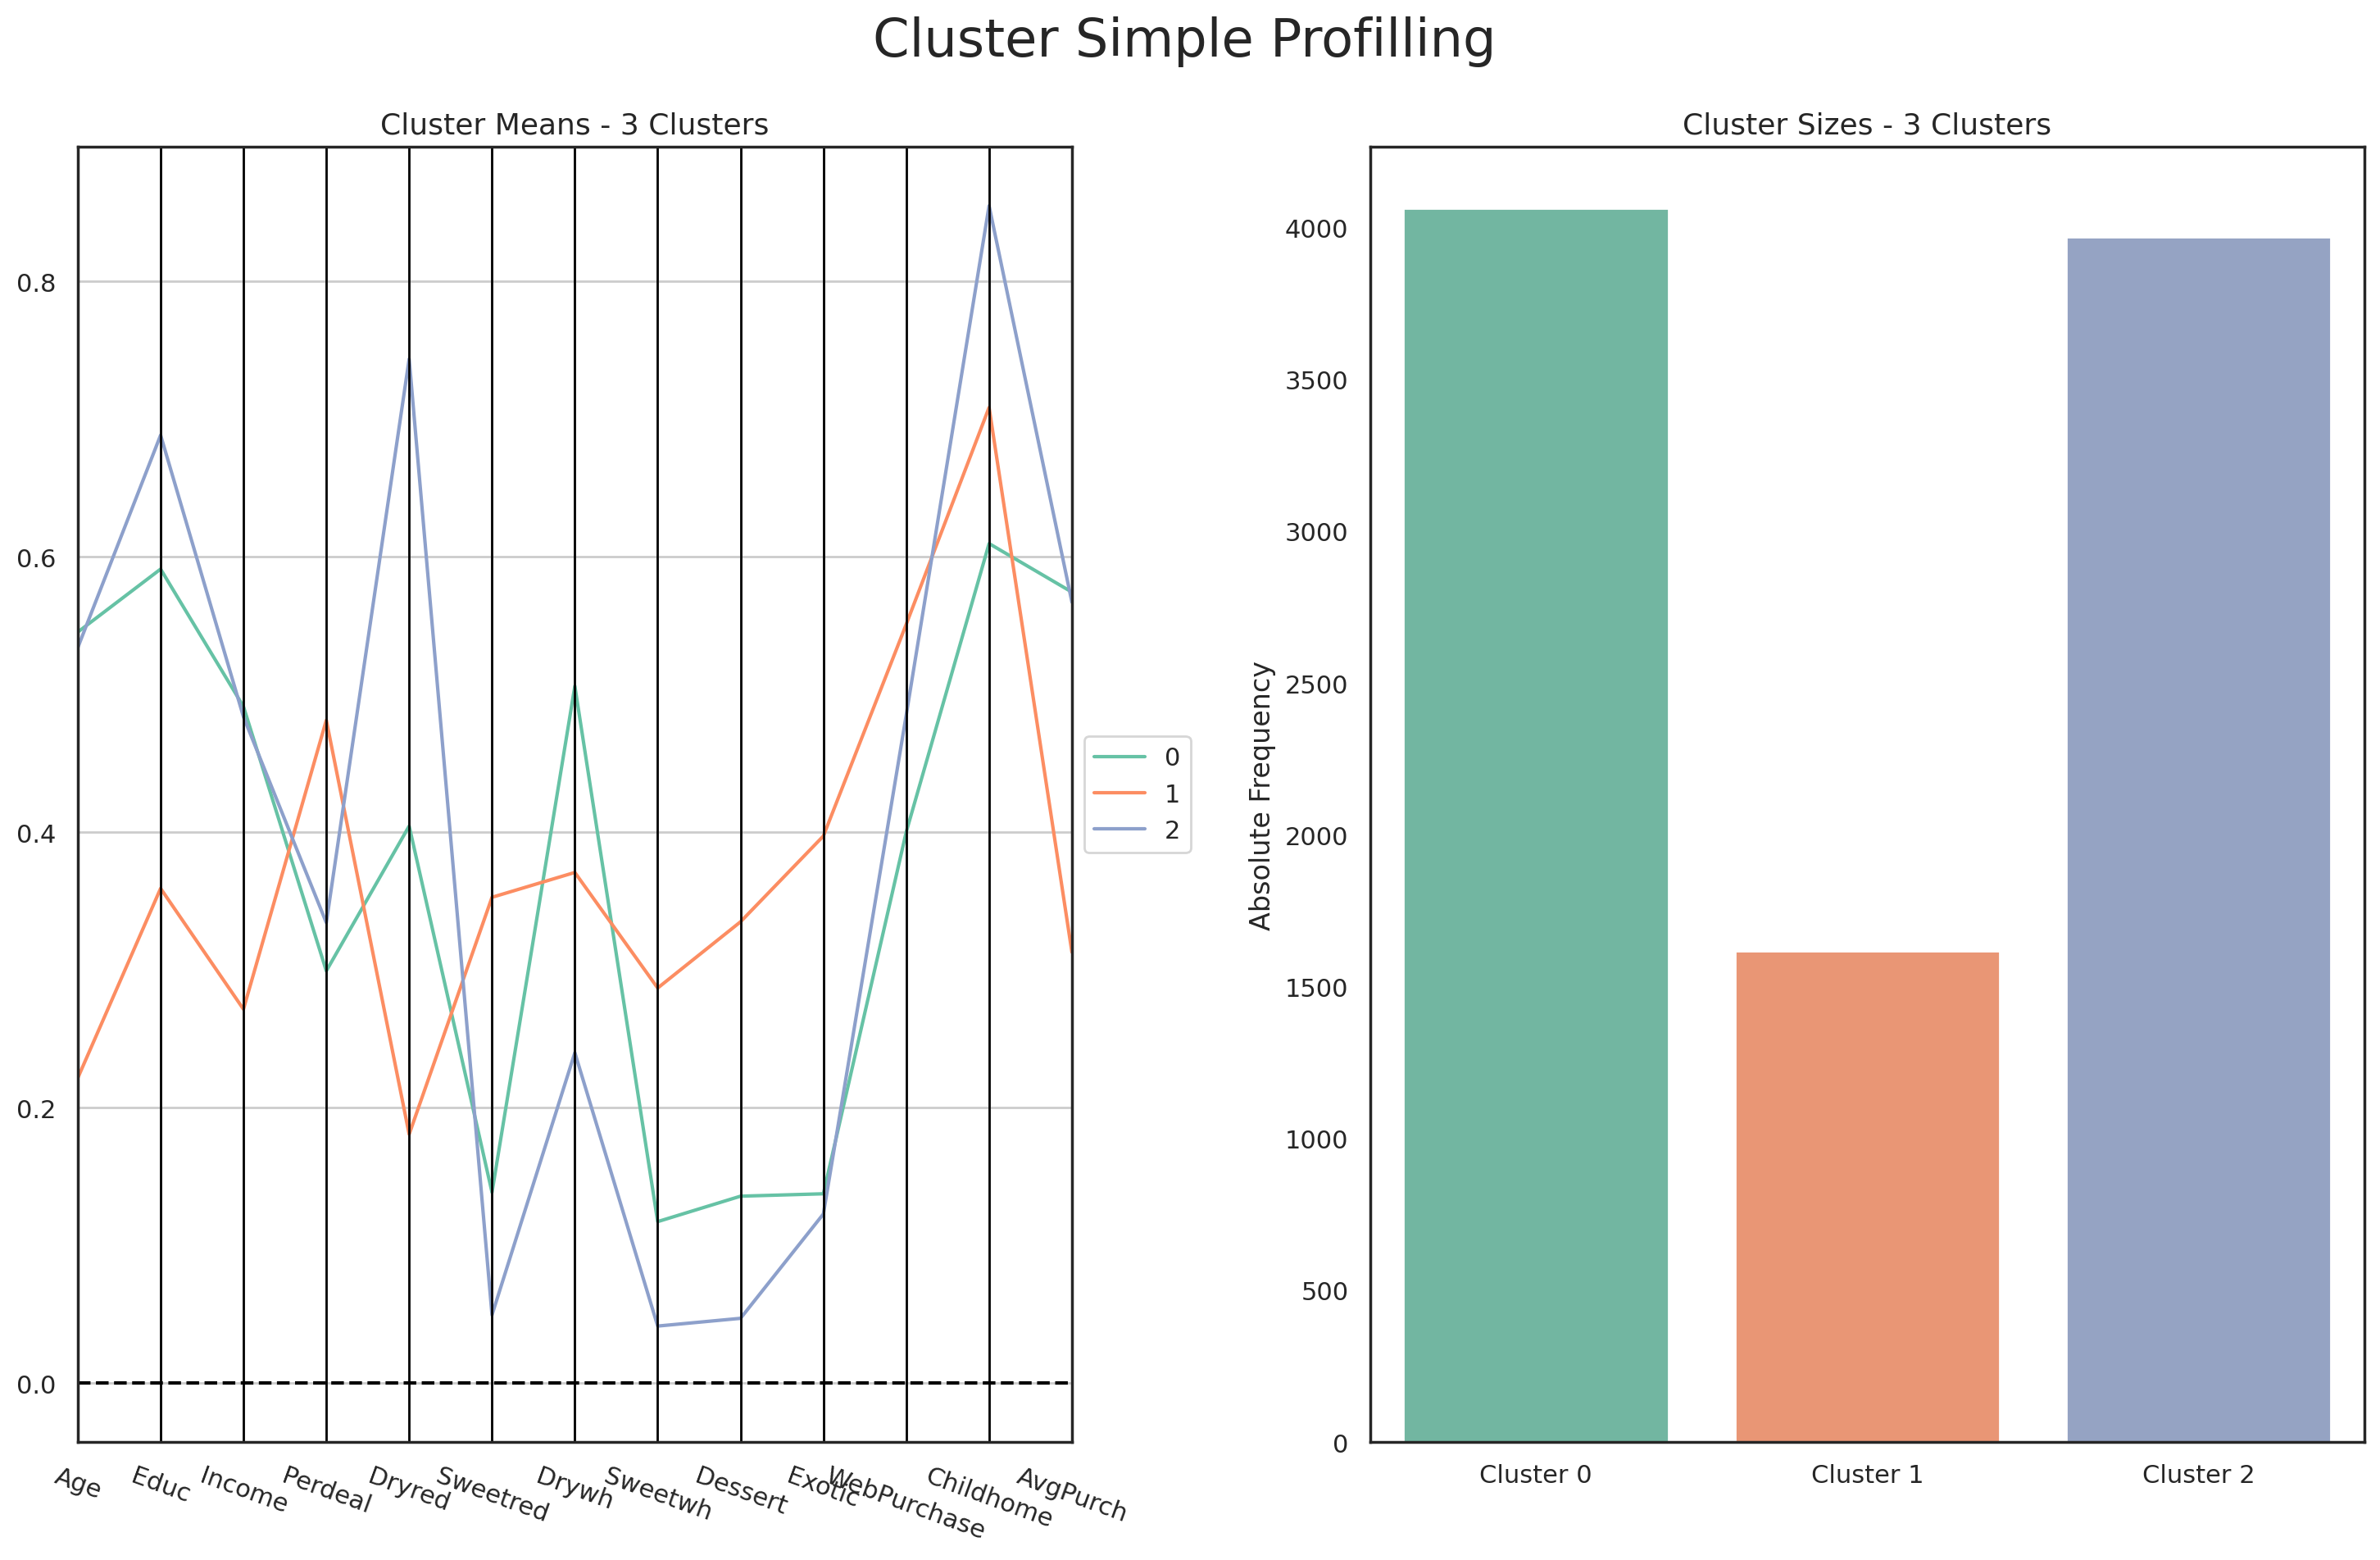

In [50]:
sns.set(style="white")
cluster_profiles(
    df_test = df_wine_chrc,
    figsize = (18, 10),
    label_columns=['labels_wine'],
    colors='Set2'
)

<hr>
<a class="anchor" name="hierarchical_clustering">
    
# 7.2 Hierarchical Clustering
    
</a>


In [51]:
def cluster_heatmaps(df,
                     label_columns,
                     figsize=(20,20),
                     compar_titles=None,
                     heat_colors='RdYlBu',
                     bar_colors='Set2'):

    if compar_titles == None:
        compar_titles = [""]*len(label_columns)

    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2,
                             figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):

        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)

        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]


        # Setting Data
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(counts.shape[0])]

        sns.heatmap(centroids.drop(columns=label),
              square=False, cmap=heat_colors,
              ax=ax[0],
              )

        ax[0].set_title("Cluster Means Heatmap - {} Clusters".format(counts.shape[0]), fontsize=18)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[0].set_yticklabels(cluster_labels, rotation=0)
        ax[1].annotate(text=titl, xy=(-0.3,1.15),
                       xycoords='axes fraction',
                       fontsize=18, fontweight = 'heavy')


        sns.barplot(y=label, x="counts", data=counts, ax=ax[1], orient='h', palette=bar_colors)
        ax[1].set_yticklabels(cluster_labels)
        ax[1].set_title("Cluster Sizes - {} Clusters".format(counts.shape[0]), fontsize=18)
        ax[1].set_ylabel("")

    plt.subplots_adjust(hspace=0.4, wspace=0.3, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

In [52]:
def get_r2_hc(df_2, link_method, max_nclus, min_nclus=1, dist="euclidean"):

    def get_ss(df_2):
        ss = np.sum(df_2.var() * (df_2.count() - 1))
        return ss  # return sum of sum of squares of each df variable

    sst = get_ss(df_2)  # get total sum of squares

    r2 = []  # where we will store the R2 metrics for each cluster solution

    for i in range(min_nclus, max_nclus+1):  # iterate over desired ncluster range
        cluster = AgglomerativeClustering(n_clusters=i, metric=dist, linkage=link_method)

        hclabels = cluster.fit_predict(df_2) # get cluster labels

        df_hc = pd.concat((df_2, pd.Series(hclabels, name='labels', index=df_2.index)), axis=1)  # concat df with labels

        ssw_labels = df_hc.groupby(by='labels').apply(get_ss)  # compute ssw for each cluster labels

        ssb = sst - np.sum(ssw_labels)  # SST = SSW + SSB

        r2.append(ssb / sst)

    return np.array(r2)

In [53]:
# This function plots the R2 values for each linkage method for cluster sizes from 1 to 10

def plot_r2_linkage(df_2, max_nclus):
    # Prepare input
    hc_methods = ["ward", "complete", "average", "single"]
    # Call function defined above to obtain the R2 statistic for each hc_method
    max_nclus = 10
    r2_hc_methods = np.vstack(
        [
            get_r2_hc(df_2=df_2, link_method=link, max_nclus=max_nclus)
            for link in hc_methods
        ]
    ).T
    r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

    sns.set()
    # Plot data
    fig = plt.figure(figsize=(11,5))
    sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

    # Finalize the plot
    fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
    plt.gca().invert_xaxis()  # invert x axis
    plt.legend(title="HC methods", title_fontsize=11)
    plt.xticks(range(1, max_nclus + 1))
    plt.xlabel("Number of clusters", fontsize=13)
    plt.ylabel("R2 metric", fontsize=13)

    plt.show()

/tmp/ipython-input-3115883178.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssw_labels = df_hc.groupby(by='labels').apply(get_ss)  # compute ssw for each cluster labels
/tmp/ipython-input-3115883178.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssw_labels = df_hc.groupby(by='labels').apply(get_ss)  # compute ssw for each cluster labels
/tmp/ipython-input-3115883178.py:18: DeprecationWarning: D

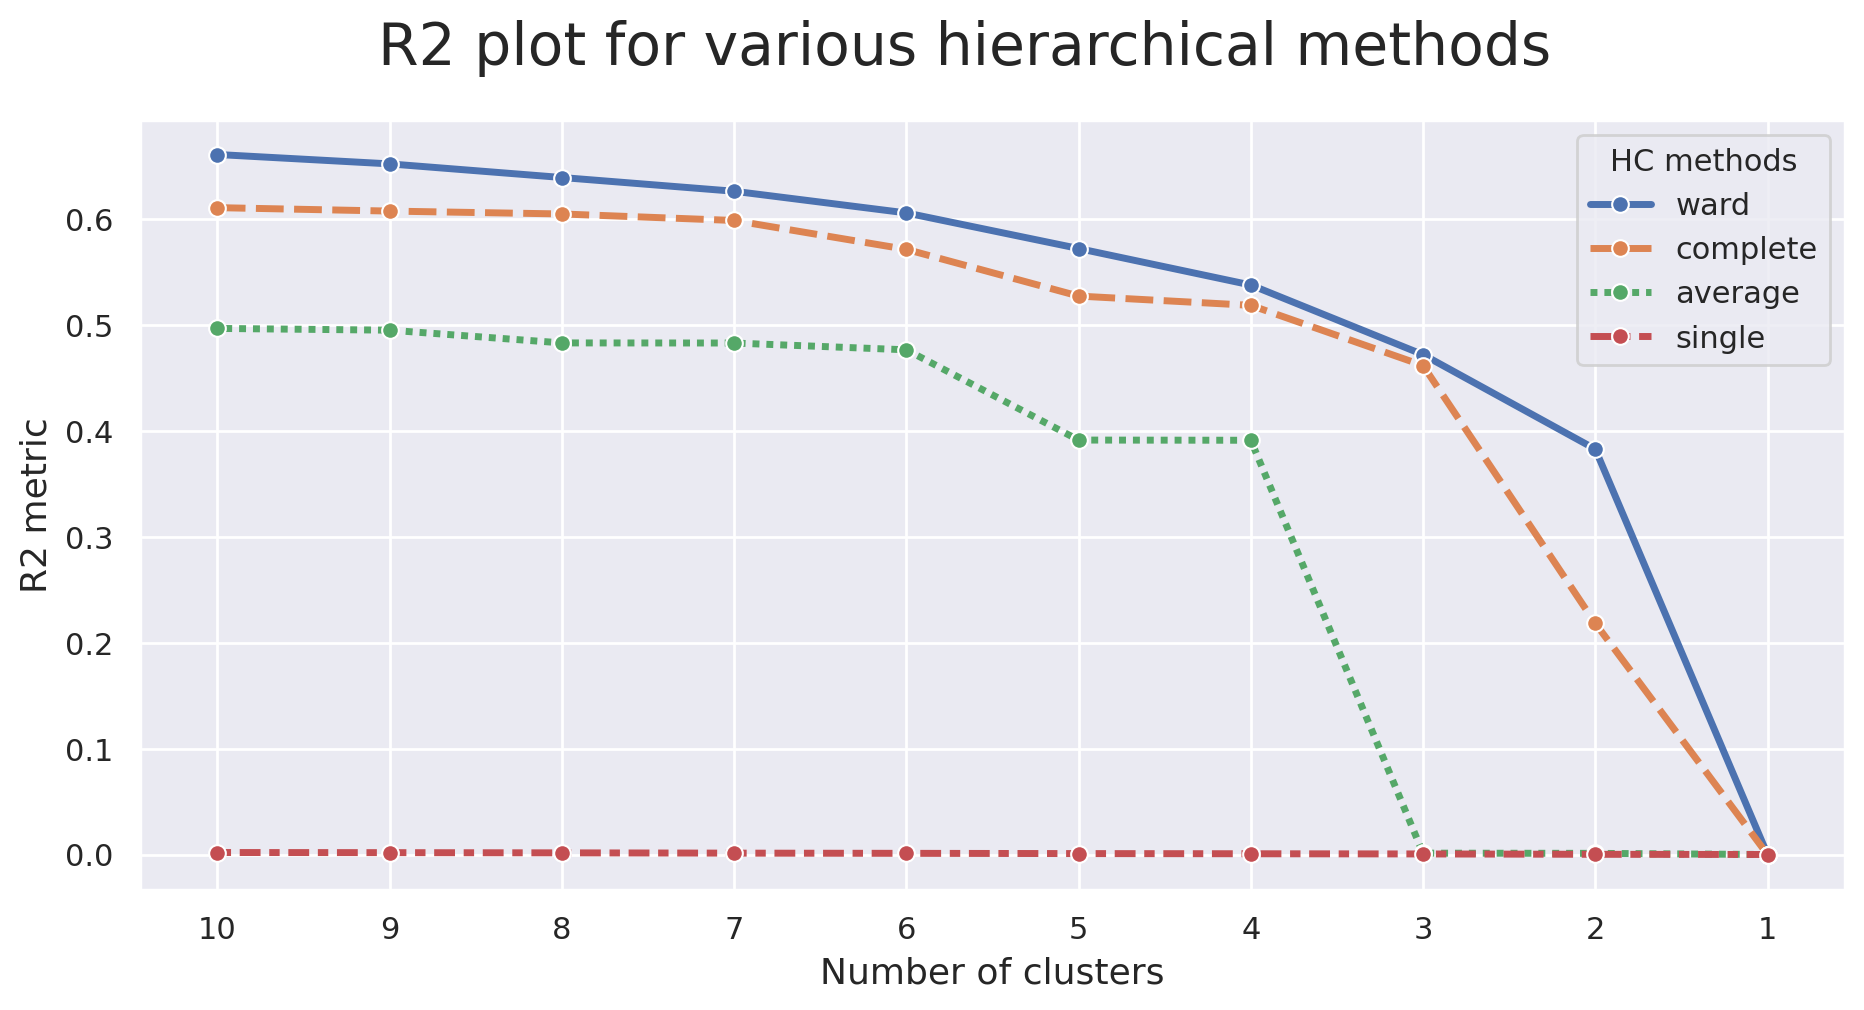

In [54]:
max_nclus = 10
plot_r2_linkage(df_2[metric], max_nclus)


<hr>
<a class="anchor" name="hc_client">
    
# 7.2.1. Client Clusters
    
</a>

In [55]:
def plot_dendrogram(df_2, Client_variables,
                    linkage='ward', distance='euclidean',
                    y_threshold = 75):

  # setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
  hclust = AgglomerativeClustering(linkage=linkage,
                                  metric=distance,
                                  distance_threshold=0,
                                  n_clusters=None)

  hclust.fit_predict(df_2[Client_variables])

  # create the counts of samples under each node (number of points being merged)
  counts = np.zeros(hclust.children_.shape[0])
  n_samples = len(hclust.labels_)

  # hclust.children_ contains the observation ids that are being merged together
  # At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
  for i, merge in enumerate(hclust.children_):
      # track the number of observations in the current cluster being formed
      current_count = 0
      for child_idx in merge:
          if child_idx < n_samples:
              # If this is True, then we are merging an observation
              current_count += 1  # leaf node
          else:
              # Otherwise, we are merging a previously formed cluster
              current_count += counts[child_idx - n_samples]
      counts[i] = current_count

  ## Create linkage matrix

  # the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
  # the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
  # the counts indicate the number of points being merged (dendrogram's x-axis)
  linkage_matrix = np.column_stack(
      [hclust.children_, hclust.distances_, counts]
  ).astype(float)

  # Plot the corresponding dendrogram
  sns.set()
  fig = plt.figure(figsize=(11,5))

  # The Dendrogram parameters need to be tuned
  # "dendrogram" function will plot our dendrogram
  dendrogram(linkage_matrix,
            truncate_mode='level',
            p=5,
            color_threshold=y_threshold,
            above_threshold_color='k')

  plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
  plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
  plt.xlabel('Number of points in node (or index of point if no parenthesis)')
  plt.ylabel(f'{distance.title()} Distance', fontsize=13)
  plt.show()


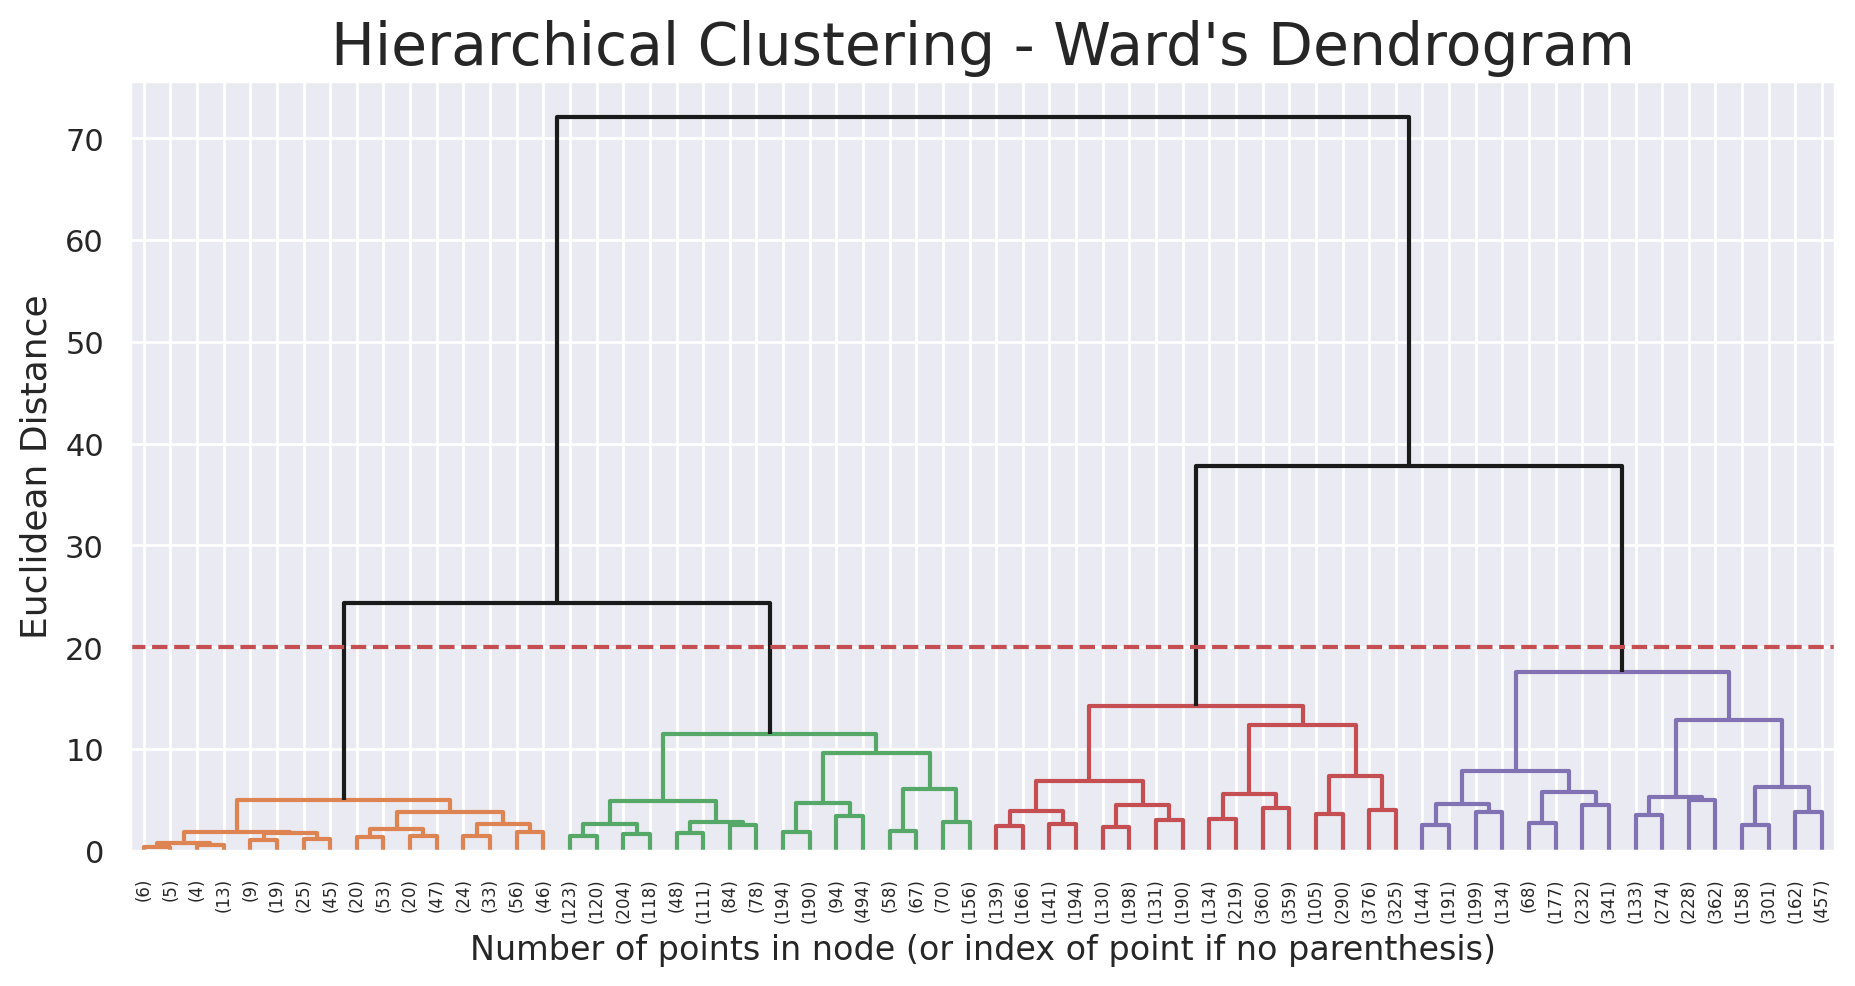

In [56]:
plot_dendrogram(df_2, Client_variables, y_threshold=20)

In [57]:
# Hierarchical Clustering - Ward's method
hclust = AgglomerativeClustering(linkage='ward',
                                 metric='euclidean',
                                 n_clusters=4)
hc_labels_c = hclust.fit_predict(df_2[Client_variables])
hc_labels_c

array([1, 1, 2, ..., 1, 0, 2])

In [58]:
def get_mean_bylabel(df_2, feats, label_name):
  # Characterizing the clusters
  return df_2[feats+[label_name]].groupby(label_name).mean()

In [59]:
df_hcc_labeled = pd.concat((df_2, pd.Series(hc_labels_c, name='hc_labels_c', index=df_2.index)),
                        axis=1)
df_hcc_labeled

,Age,Educ,Income,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,Childhome,AvgPurch,hc_labels_c
0,0.833333,0.500,0.622693,0.030928,0.367347,0.098039,0.589041,0.161290,0.057692,0.020833,0.168675,False,0.883334,1
1,1.000000,1.000,0.794134,0.010309,0.551020,0.019608,0.506849,0.064516,0.038462,0.020833,0.048193,False,0.909114,1
2,0.100000,0.750,0.141401,0.680412,0.316327,0.372549,0.315068,0.016129,0.461538,0.656250,0.650602,True,0.104302,2
3,0.683333,0.875,0.644192,0.123711,0.602041,0.196078,0.246575,0.096774,0.096154,0.156250,0.361446,True,0.756938,0
4,0.683333,0.750,0.630941,0.051546,0.591837,0.098039,0.369863,0.064516,0.076923,0.197917,0.349398,True,0.824407,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.166667,0.625,0.341417,0.072165,0.408163,0.215686,0.479452,0.016129,0.211538,0.437500,0.313253,False,0.791792,1
9996,0.966667,0.375,0.893872,0.030928,0.612245,0.039216,0.328767,0.080645,0.115385,0.010417,0.481928,True,0.929240,0
9997,0.850000,0.875,0.690881,0.020619,0.459184,0.000000,0.383562,0.177419,0.269231,0.041667,0.156627,False,0.896306,1
9998,0.783333,0.250,0.778679,0.041237,0.479592,0.313725,0.356164,0.129032,0.019231,0.083333,0.373494,True,0.880611,0


In [60]:
hc_means_df = get_mean_bylabel(df_hcc_labeled, Client_variables, 'hc_labels_c')
hc_means_df.style.background_gradient(axis=0)

,Educ,Income,AvgPurch,WebPurchase,Perdeal,Childhome
hc_labels_c,,,,,,
0,0.667509,0.518428,0.617594,0.462822,0.239166,1.000000
1,0.624943,0.673211,0.840765,0.184830,0.031539,0.000000
2,0.516380,0.273350,0.265234,0.619567,0.657891,1.000000
3,0.407941,0.184437,0.278573,0.578937,0.299697,0.000000


/tmp/ipython-input-3098557792.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=label, x="counts", data=counts, ax=ax[1], orient='h', palette=bar_colors)
/tmp/ipython-input-3098557792.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(cluster_labels)


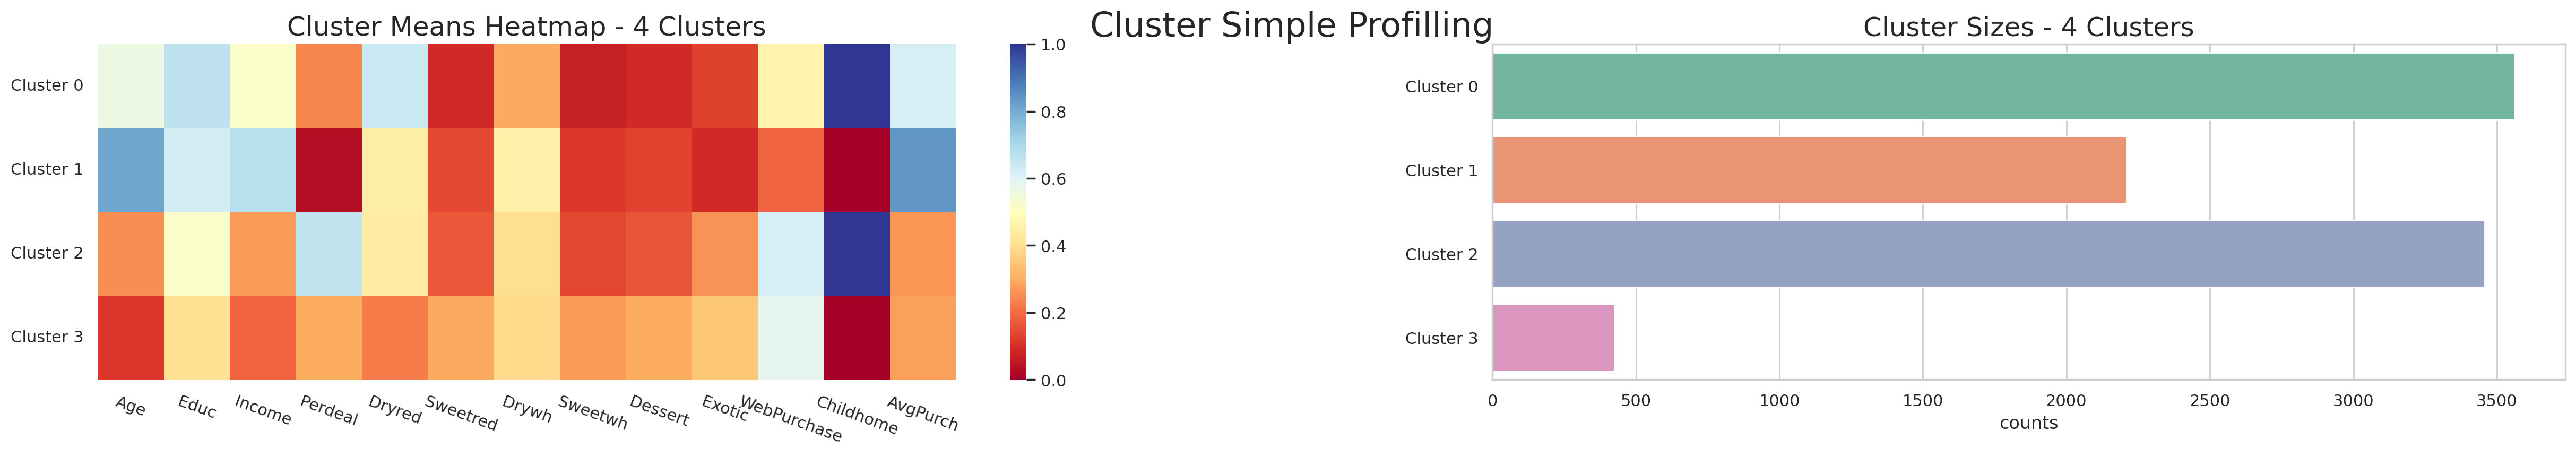

In [61]:
sns.set(style="whitegrid")
cluster_heatmaps(
    df = df_hcc_labeled,
    label_columns=['hc_labels_c'],
    figsize = (30, 4)
)

<hr>
<a class="anchor" name="hc_wine">
    
# 7.2.2. Wine Clusters
    
</a>

In [62]:
def plot_dendrogram(df_2, Wine_variables,
                    linkage='ward', distance='euclidean',
                    y_threshold = 75):

  # setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
  hclust = AgglomerativeClustering(linkage=linkage,
                                  metric=distance,
                                  distance_threshold=0,
                                  n_clusters=None)

  hclust.fit_predict(df_2[Wine_variables])

  # create the counts of samples under each node (number of points being merged)
  counts = np.zeros(hclust.children_.shape[0])
  n_samples = len(hclust.labels_)

  # hclust.children_ contains the observation ids that are being merged together
  # At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
  for i, merge in enumerate(hclust.children_):
      # track the number of observations in the current cluster being formed
      current_count = 0
      for child_idx in merge:
          if child_idx < n_samples:
              # If this is True, then we are merging an observation
              current_count += 1  # leaf node
          else:
              # Otherwise, we are merging a previously formed cluster
              current_count += counts[child_idx - n_samples]
      counts[i] = current_count

  ## Create linkage matrix

  # the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
  # the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
  # the counts indicate the number of points being merged (dendrogram's x-axis)
  linkage_matrix = np.column_stack(
      [hclust.children_, hclust.distances_, counts]
  ).astype(float)

  # Plot the corresponding dendrogram
  sns.set()
  fig = plt.figure(figsize=(11,5))

  # The Dendrogram parameters need to be tuned
  # "dendrogram" function will plot our dendrogram
  dendrogram(linkage_matrix,
            truncate_mode='level',
            p=5,
            color_threshold=y_threshold,
            above_threshold_color='k')

  plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
  plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
  plt.xlabel('Number of points in node (or index of point if no parenthesis)')
  plt.ylabel(f'{distance.title()} Distance', fontsize=13)
  plt.show()


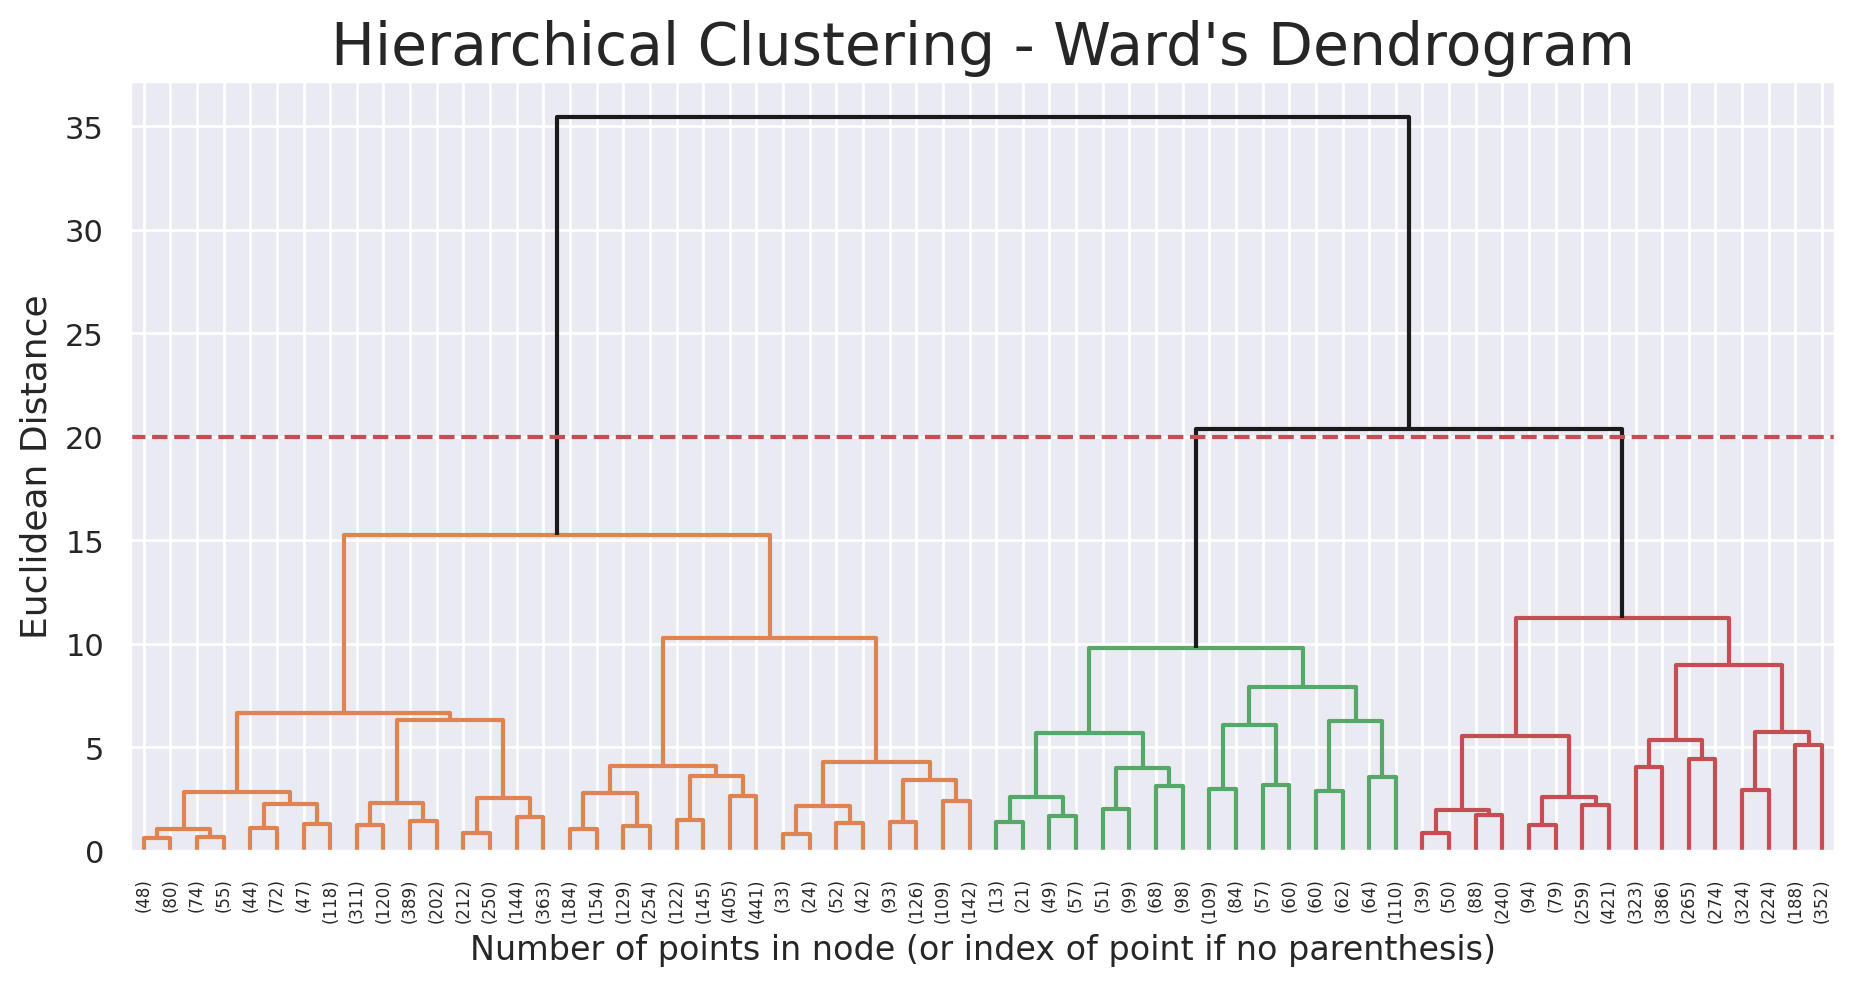

In [63]:
plot_dendrogram(df_2, Wine_variables, y_threshold=20)

In [64]:
# Hierarchical Clustering - Ward's method
hclust = AgglomerativeClustering(linkage='ward',
                                 metric='euclidean',
                                 n_clusters=3)
hc_labels_w = hclust.fit_predict(df_2[Wine_variables])
hc_labels_w

array([1, 1, 1, ..., 1, 1, 2])

In [65]:
df_hcw_labeled = pd.concat((df_2, pd.Series(hc_labels_w, name='hc_labels_w', index=df_2.index)),
                        axis=1)
df_hcw_labeled

,Age,Educ,Income,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,Childhome,AvgPurch,hc_labels_w
0,0.833333,0.500,0.622693,0.030928,0.367347,0.098039,0.589041,0.161290,0.057692,0.020833,0.168675,False,0.883334,1
1,1.000000,1.000,0.794134,0.010309,0.551020,0.019608,0.506849,0.064516,0.038462,0.020833,0.048193,False,0.909114,1
2,0.100000,0.750,0.141401,0.680412,0.316327,0.372549,0.315068,0.016129,0.461538,0.656250,0.650602,True,0.104302,1
3,0.683333,0.875,0.644192,0.123711,0.602041,0.196078,0.246575,0.096774,0.096154,0.156250,0.361446,True,0.756938,0
4,0.683333,0.750,0.630941,0.051546,0.591837,0.098039,0.369863,0.064516,0.076923,0.197917,0.349398,True,0.824407,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.166667,0.625,0.341417,0.072165,0.408163,0.215686,0.479452,0.016129,0.211538,0.437500,0.313253,False,0.791792,0
9996,0.966667,0.375,0.893872,0.030928,0.612245,0.039216,0.328767,0.080645,0.115385,0.010417,0.481928,True,0.929240,0
9997,0.850000,0.875,0.690881,0.020619,0.459184,0.000000,0.383562,0.177419,0.269231,0.041667,0.156627,False,0.896306,1
9998,0.783333,0.250,0.778679,0.041237,0.479592,0.313725,0.356164,0.129032,0.019231,0.083333,0.373494,True,0.880611,1


In [66]:
hc_means_df = get_mean_bylabel(df_hcw_labeled, Wine_variables, 'hc_labels_w')
hc_means_df.style.background_gradient(axis=0)

,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic
hc_labels_w,,,,,,
0,0.695935,0.060413,0.280866,0.049656,0.059564,0.147831
1,0.350578,0.170652,0.507256,0.146597,0.169568,0.139172
2,0.146681,0.390532,0.358422,0.310598,0.351097,0.424896


/tmp/ipython-input-3098557792.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=label, x="counts", data=counts, ax=ax[1], orient='h', palette=bar_colors)
/tmp/ipython-input-3098557792.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(cluster_labels)


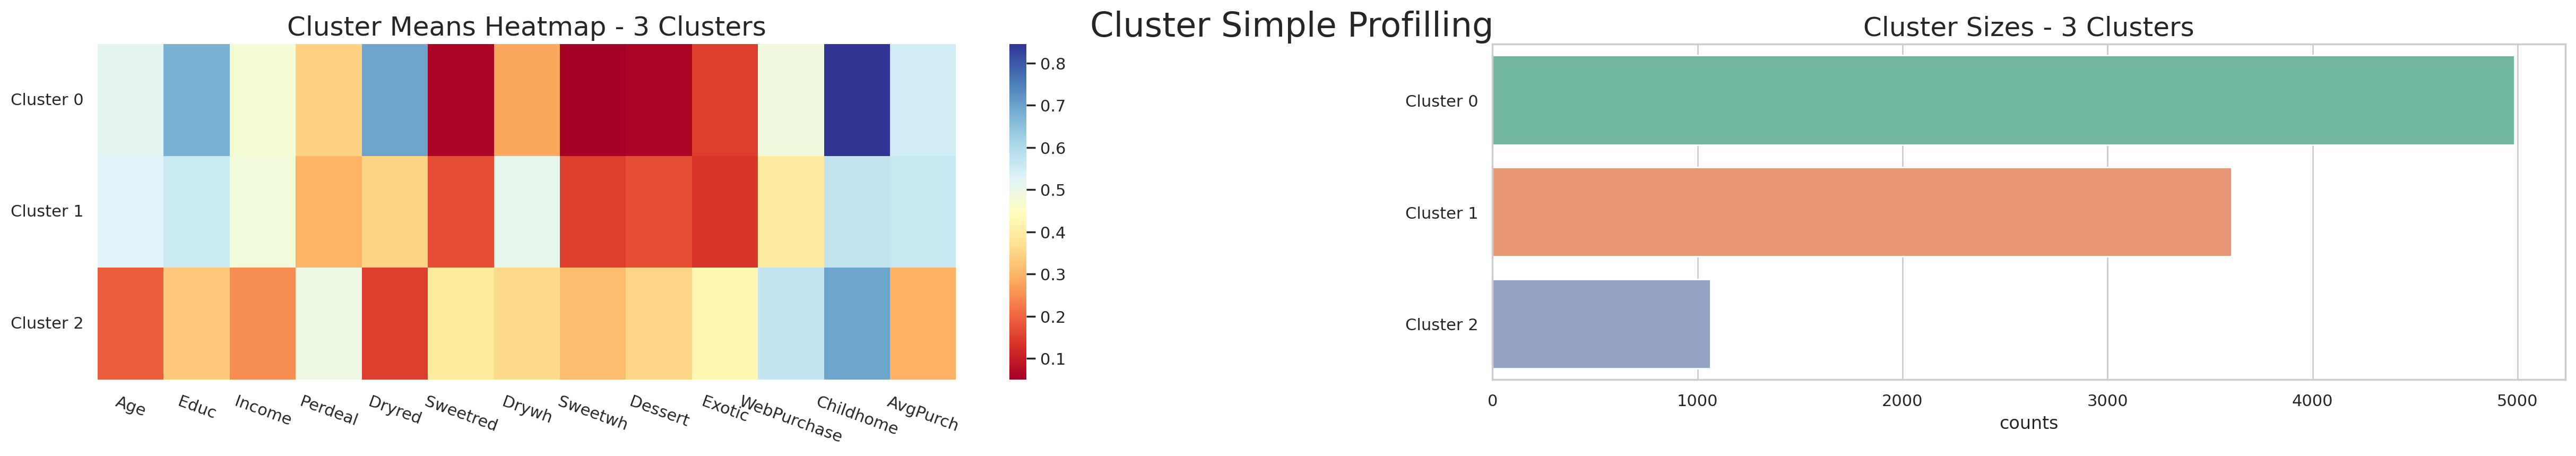

In [67]:
sns.set(style="whitegrid")
cluster_heatmaps(
    df = df_hcw_labeled,
    label_columns=['hc_labels_w'],
    figsize = (30, 4)
)